In [1]:
import numpy as np
import random
from tqdm.notebook import trange
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from IPython.display import SVG, display_html
from sknetwork.data import karate_club
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.visualization import visualize_graph
from sknetwork.ranking import PageRank, Katz
from sknetwork.data import from_edge_list
from sklearn.metrics import adjusted_rand_score
from collections import defaultdict
import community as community_louvain

In [2]:
# TO GET THE DATA UNCOMMENT THE FOLLOWING LINES
# !mkdir data
# !wget https://snap.stanford.edu/data/facebook_combined.txt.gz
# !wget https://snap.stanford.edu/data/web-NotreDame.txt.gz
# !gunzip facebook_combined.txt.gz
# !gunzip web-NotreDame.txt.gz
# !mv facebook_combined.txt data/
# !mv web-NotreDame.txt data/
# !rm *.gz
# !sed -i '/^#/d' data/web-NotreDame.txt

# Linear Algebra

## Question 2.  Prove that $A^n = X\Lambda ^n X^{−1}$

Assuming A in invertible, we prove this by induction. 

For $n=1$ its given since 

$$A^1 = X\Lambda ^1 X^{−1} \rightarrow A = X\Lambda X^{−1}$$


Assuming the property holds for n (that is  $A^n = X\Lambda ^n X^{−1}$), we prove it for (n+1)
$$A^{n+1} = A^n\times A $$
by induction hypothesis
$$ = X\Lambda ^n X^{−1} \times X\Lambda X^{−1}  = X\Lambda ^{n+1} X^{−1} $$
**QED**

We can show this is the case for an example matrix.

## Question 4. Find determinants, eigenvector and eigen values 

Without multiplying 

$$
S = \begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta 
\end{bmatrix}
\begin{bmatrix}
2 & 0 \\
0 & 5 
\end{bmatrix}
\begin{bmatrix}
\cos \theta & \sin \theta \\
-\sin \theta & \cos \theta 
\end{bmatrix}
$$

find the determinant, the eigenvalues and eigenvectors, why S is positive definite

Let 
$$
S = \begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta 
\end{bmatrix}
\begin{bmatrix}
2 & 0 \\
0 & 5 
\end{bmatrix}
\begin{bmatrix}
\cos \theta & \sin \theta \\
-\sin \theta & \cos \theta 
\end{bmatrix}
$$

Then we know that $T_1 = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix}$  is a rotation matrix that rotates a vector $\theta$ degrees counterclockwise.

Similarly we have that $T_2 = \begin{bmatrix} \cos \theta & \sin \theta \\ -\sin \theta & \cos \theta \end{bmatrix}$ is a rotation matrix that rotates a vector $\theta$ degrees clockwise.

So by multiplying by $S$ what we are truly doing is rotating clockwise $\theta$, then multiplying by $E = \begin{bmatrix} 2 & 0 \\ 0 & 5 \end{bmatrix}$ which is expanding on the X and Y axis by 2 and 5 respectevly and then is rotating everything counterclockwise $\theta$ degrees.

For the **determinant** it is easy to see that $T_1$ and $T_2$ are ortogonal and have determinant 1, similarly is easy to see that $det(E)=2*5=10$, so the determinant of $S$ can be calculated by 
$$det(S)= det(T_1 E T_2) = det(T_1)\times det(E) \times det(T_2) = 1 \times 10 \times 1 = 10$$

The **eigenvalues** are clearly 2 and 5, since we are expanding in $E$ by those values the first and second axis.

The **eigenvectors** are easy to find as well since what we need is to get the vectors that when $T_2$ is applied have either the first or the second axis null. We can rotate some vector like $\begin{bmatrix}1\\0 \end{bmatrix}$ that has the second axis nullyfied, by the inverse of $T_2$ which is $T_1$. 

Thus our eigenvector for the eigenvalue 2 is $T_1 \begin{bmatrix}1\\0 \end{bmatrix} = \begin{bmatrix}\cos \theta \\ \sin \theta \end{bmatrix}$

Similarly for eigenvalue 5 the eigenvector is $T_1 \begin{bmatrix}0\\1 \end{bmatrix} = \begin{bmatrix}-\sin \theta \\ \cos \theta \end{bmatrix}$

## Question 5. For what numbers *c* and *d* such that **S** and **T** are positive definite 

$$
S = \begin{pmatrix} c & 1 & 1 \\ 1 & c & 1 \\ 1 & 1 & c \end{pmatrix}
T = \begin{pmatrix} 1 & 2 & 3 \\ 2 & d & 4 \\ 3 & 4 & 5 \end{pmatrix} 
$$

A matrix is positive definite if all its eigenvalues are positive.

$
S = \begin{pmatrix}
c & 1 & 1 \\
1 & c & 1 \\
1 & 1 & c
\end{pmatrix}
$

Let $ S = cI + A $, where $ I $ is the identity matrix and $ A $ is:
$
A = \begin{pmatrix}
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{pmatrix}
$

$
\det(A - \lambda I) = 0
$
$
\begin{vmatrix}
-\lambda & 1 & 1 \\
1 & -\lambda & 1 \\
1 & 1 & -\lambda
\end{vmatrix} = 0
$

$
-\lambda^3 + 3\lambda + 2 = 0
$

$
\lambda^3 - 3\lambda - 2 = 0
$

The eigenvalues of $ A $ are $ \lambda_1 = 2 $ and $ \lambda_2 = \lambda_3 = -1 $.

**Eigenvalues of $ S $:**
$
\mu_1 = c + 2 \\
\mu_2 = \mu_3 = c - 1
$

For $ S $ to be positive definite, all $ \mu_i > 0 $:

$
c + 2 > 0 \implies c > -2 \\
c - 1 > 0 \implies c > 1
$

The most restrictive condition is $ c > 1 $. Thus, $ S $ is positive definite when $ c > 1 $.





$
T = \begin{pmatrix}
1 & 2 & 3 \\
2 & d & 4 \\
3 & 4 & 5
\end{pmatrix}
$

$
\det(T - \lambda I) =
$
$
\begin{vmatrix}
1 - \lambda & 2 & 3 \\
2 & d - \lambda & 4 \\
3 & 4 & 5 - \lambda
\end{vmatrix} = 0
$

$
\lambda^3 - (d + 6)\lambda^2 - (24 - 6d)\lambda + (4d - 12) = 0
$

$
\text{Sum of eigenvalues} = \lambda_1 + \lambda_2 + \lambda_3 = d + 6 \\
\text{Product of eigenvalues} = \lambda_1 \lambda_2 \lambda_3 = (4d - 12)
$

For all eigenvalues to be positive:
1. $ d + 6 > 0 \implies d > -6 $.
2. $ 4d - 12 > 0 \implies d < 3 $.

Therefore, $ -6 < d < 3 $. 

But if $d \lt 3$, then the product of eigenvalues is $\le 0$, which means one of the eigenvalues if 0 or negative. Then, the matrix cannot be positive definite then.

**Conclusion:** There is no value of $d$ such that $T$ is positive definite.


## Question 7. What is the determinant of any orthogonal matrix?

Let $ Q $ be an orthogonal matrix and $I$ is the identity matrix. Then:

$
Q^T Q = I
$

$
\det(Q^T Q) = \det(I)
$

$
\det(Q^T) \cdot \det(Q) = 1
$

$
[\det(Q)]^2 = 1
$

$
\det(Q) = \pm 1
$

**Any orthogonal matrix** Q satisfies:
$
\det(Q) = \pm 1
$


## Question 8
For an undirected graph both the adjacency matrix and the Laplacian matrix are symmetric. Show that 
Laplacian is positive semi-definite matrix. Show that Laplacian that 0 is en eigenvalue (the smallest one).

### Formalism

Let us have the *incidence matrix* which has shape $m\times n$ 
$$
B(G) = 
\begin{cases} 
1 & \text{if there is an edge and a node } (v, w) \text{ and } v < w \\
-1 & \text{if there is an edge and a node } (v, w) \text{ and } v > w \\
0 & \text{otherwise.}
\end{cases}
$$


For example we have the graph $G$

![Graph](https://i.ibb.co/9NmP2Z5/Screenshot-from-2024-11-23-18-39-32.png)

$$
L_G = 
\begin{pmatrix}
3 & -1 & -1 & -1 \\
-1 & 1 & 0 & 0 \\
-1 & 0 & 1 & 0 \\
-1 & 0 & 0 & 1
\end{pmatrix}
$$

The incidence matrix  :

$$
B(G) = 
\begin{pmatrix}
1 & -1 & 0 & 0 \\
1 & 0 & -1 & 0 \\
1 & 0 & 0 & -1
\end{pmatrix}
$$


Then we want to prove that the laplacian matrix can be written as $L = B^T B$

**Proof**

Lets realize that for each cell $i,j$ , we have that they are the product of the $i$-th column of $B$ with the $j$-th column of B. Then we can differentiate three cases

1. $i=j$ : This is clearly the degree of $i$, since for each node that goes into it we add 1.
2. $i \not = j$ with no edge between $i$ and $j$: Then the "bitmap" of each column wont match in any node and the result will be 0 as expected
3. $i \not = j$ with an edge between $i$ and $j$: Then the "bitmap" matches in exactly one element where one is $-1$ and the other one is $1$. Thus the result is $-1$ as expected.

**QED**


Thus since we can express $L$ as $L = B^T B$ then it is positive semidefinite.


#### There is a 0 eigenvalue
Let us take $1$ as the vector of only $1$ in each component.

Then $L1 =(D-A)1 = D1 - A 1 = \text{degree vector} - \text{degree vector} = 0 $. Thus it has 0 as an eigenvalue.




# Comparison between Ordinary and Lazy PageRank

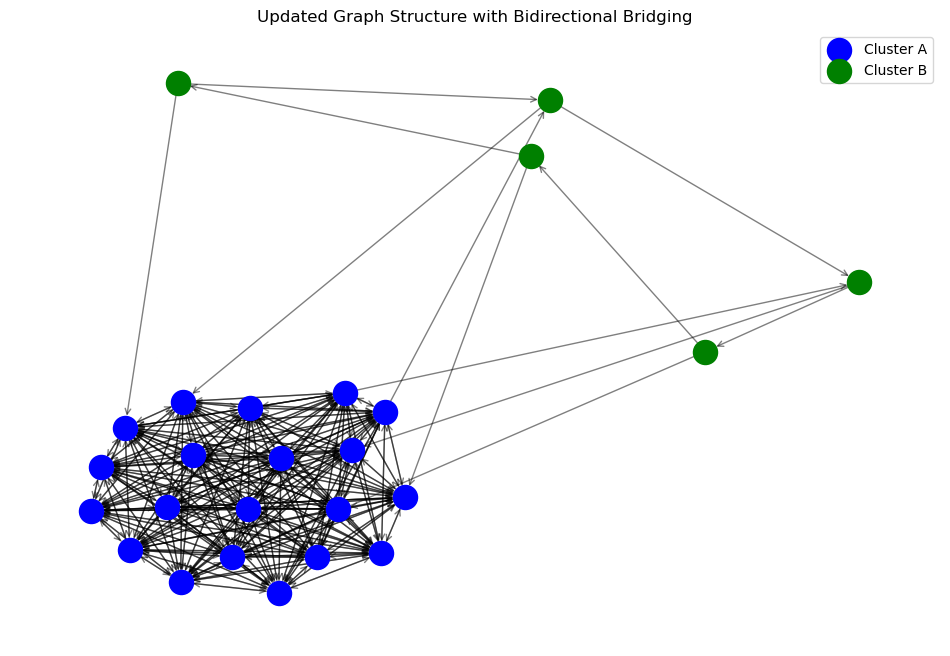

In [3]:
# Create an empty directed graph
G = nx.DiGraph()

# Cluster A: Dense SCC with 20 nodes
cluster_a_nodes = range(1, 21)
G.add_nodes_from(cluster_a_nodes)

# Add edges to make Cluster A strongly connected
for node in cluster_a_nodes:
    for target in cluster_a_nodes:
        if node != target:
            G.add_edge(node, target)

# Cluster B: Sparse component with 5 nodes
cluster_b_nodes = range(21, 26)
G.add_nodes_from(cluster_b_nodes)

# Add sparse edges within Cluster B (forming a ring)
for i in range(len(cluster_b_nodes)):
    G.add_edge(cluster_b_nodes[i], cluster_b_nodes[(i + 1) % len(cluster_b_nodes)])

# Bridging edges from Cluster B to Cluster A
for node in cluster_b_nodes:
    target = random.choice(list(cluster_a_nodes))
    G.add_edge(node, target)

# **New:** Bridging edges from Cluster A to Cluster B
for node in cluster_a_nodes:
    if random.random() < 0.1:  # 10% chance to add an edge to Cluster B
        target = random.choice(list(cluster_b_nodes))
        G.add_edge(node, target)

# Visualize the updated graph structure
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, nodelist=cluster_a_nodes, node_color='blue', label='Cluster A')
nx.draw_networkx_nodes(G, pos, nodelist=cluster_b_nodes, node_color='green', label='Cluster B')
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', arrowsize=10, alpha=0.5)
plt.title('Updated Graph Structure with Bidirectional Bridging')
plt.legend()
plt.axis('off')
plt.show()


In [4]:
# # Create a graph with characteristics where Lazy PageRank converges faster
# # 1. Include dangling nodes
# # 2. Disconnected components
# # 3. Strongly connected clusters

# # Initialize the graph
# G = nx.DiGraph()

# # Add a strongly connected cluster (component 1)
# G.add_edges_from([
#     (1, 2), (2, 3), (3, 4), (4, 1), (2, 4), (3, 1)
# ])

# # Add another strongly connected cluster (component 2)
# G.add_edges_from([
#     (5, 6), (6, 7), (7, 8), (8, 5), (6, 8), (7, 5)
# ])

# # Add dangling nodes connected to cluster 1
# G.add_edges_from([
#     (9, 1), (10, 2)
# ])

# # Add dangling nodes connected to cluster 2
# G.add_edges_from([
#     (11, 5), (12, 6)
# ])

# # Add disconnected nodes (dangling nodes with no outgoing edges)
# G.add_nodes_from([13, 14])

# # Visualize the graph
# pos = nx.spring_layout(G, seed=42)  # Position for consistent layout
# plt.figure(figsize=(10, 8))
# nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, font_size=15)
# plt.title("Graph with Properties Favorable for Lazy PageRank")
# plt.show()


In [5]:
def power_iteration(P, alpha=0.85, max_iter=100, tol=1e-6):
    n = P.shape[0]
    r = np.ones(n) / n  # Initial rank vector
    residuals = []
    for i in range(max_iter):
        r_new = alpha * P.T @ r + (1 - alpha) / n
        residual = np.linalg.norm(r_new - r, 1)
        residuals.append(residual)
        if residual < tol:
            break
        r = r_new
    return r, residuals

def power_iteration_lazy(P, alpha=0.85, lazy_prob=0.5, max_iter=100, tol=1e-6):
    n = P.shape[0]
    r = np.ones(n) / n  # Initial rank vector
    residuals = []
    P_lazy = lazy_prob * np.eye(n) + (1 - lazy_prob) * P
    for i in range(max_iter):
        r_new = alpha * P_lazy.T @ r + (1 - alpha) / n
        residual = np.linalg.norm(r_new - r, 1)
        residuals.append(residual)
        if residual < tol:
            break
        r = r_new
    return r, residuals


In [6]:
# Get the adjacency matrix as a dense numpy array
A = nx.adjacency_matrix(G).astype(float).toarray()
n = A.shape[0]

# Compute row sums
row_sums = A.sum(axis=1)
dangling_nodes = (row_sums == 0)

# Avoid division by zero; replace zeros in row_sums
row_sums_fixed = row_sums.copy()
row_sums_fixed[dangling_nodes] = 1.0

# Normalize to create transition matrix P
P = A / row_sums_fixed[:, np.newaxis]

# For dangling nodes, set rows to uniform probability
P[dangling_nodes, :] = 1.0 / n

# Ordinary PageRank
pr_ordinary, residuals_ordinary = power_iteration(P)

# Lazy PageRank
pr_lazy, residuals_lazy = power_iteration_lazy(P, lazy_prob=0.5)


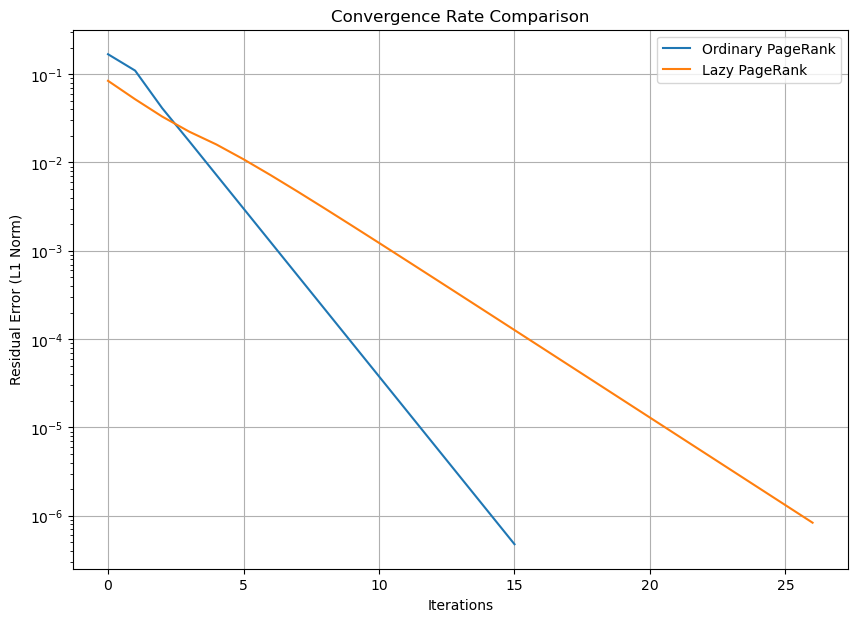

In [7]:
plt.figure(figsize=(10, 7))
plt.plot(residuals_ordinary, label='Ordinary PageRank')
plt.plot(residuals_lazy, label='Lazy PageRank')
plt.xlabel('Iterations')
plt.ylabel('Residual Error (L1 Norm)')
plt.title('Convergence Rate Comparison')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()


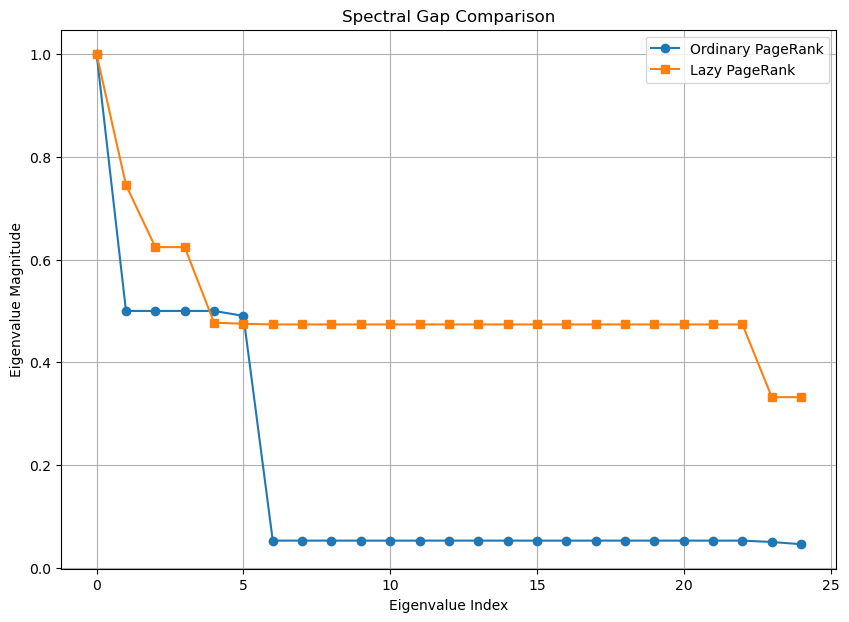

In [8]:
# Ordinary Transition Matrix
eigvals_ordinary = np.linalg.eigvals(P.T)

# Lazy Transition Matrix
P_lazy = 0.5 * np.eye(n) + 0.5 * P
eigvals_lazy = np.linalg.eigvals(P_lazy.T)

# Sort eigenvalues in descending order
eigvals_ordinary = np.sort(np.abs(eigvals_ordinary))[::-1]
eigvals_lazy = np.sort(np.abs(eigvals_lazy))[::-1]

# Plot the eigenvalues
plt.figure(figsize=(10, 7))
plt.plot(eigvals_ordinary.real, marker='o', label='Ordinary PageRank')
plt.plot(eigvals_lazy.real, marker='s', label='Lazy PageRank')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue Magnitude')
plt.title('Spectral Gap Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
def simulate_hitting_time(G, start_node, target_node, num_simulations=1000, max_steps=1000):
    hitting_times = []
    for _ in trange(num_simulations, desc="Simulating Ordinary Hitting Times"):
        current_node = start_node
        steps = 0
        while current_node != target_node and steps < max_steps:
            steps += 1
            neighbors = list(G.successors(current_node))
            if not neighbors:
                break  # Dead end
            current_node = random.choice(neighbors)
        if current_node == target_node:
            hitting_times.append(steps)
        else:
            hitting_times.append(max_steps)  # Assign max_steps if target not reached
    return np.mean(hitting_times), np.std(hitting_times)

def simulate_hitting_time_lazy(G, start_node, target_node, lazy_prob=0.5, num_simulations=1000, max_steps=1000):
    hitting_times = []
    for _ in trange(num_simulations, desc="Simulating Lazy Hitting Times"):
        current_node = start_node
        steps = 0
        while current_node != target_node and steps < max_steps:
            steps += 1
            if random.random() < lazy_prob:
                continue  # Stay at the same node
            neighbors = list(G.successors(current_node))
            if not neighbors:
                break  # Dead end
            current_node = random.choice(neighbors)
        if current_node == target_node:
            hitting_times.append(steps)
        else:
            hitting_times.append(max_steps)  # Assign max_steps if target not reached
    return np.mean(hitting_times), np.std(hitting_times)


In [10]:
# Function to check mutual reachability
def are_mutually_reachable(G, node1, node2):
    return nx.has_path(G, node1, node2) and nx.has_path(G, node2, node1)

# Select node pairs that are mutually reachable
def select_mutually_reachable_pair(G, cluster_a_nodes, cluster_b_nodes):
    while True:
        node_a = random.choice(list(cluster_a_nodes))
        node_b = random.choice(list(cluster_b_nodes))
        if are_mutually_reachable(G, node_a, node_b):
            return node_a, node_b

# Select a valid node pair
node_a, node_b = select_mutually_reachable_pair(G, cluster_a_nodes, cluster_b_nodes)
print(f"Selected Node A: {node_a} (Cluster A), Node B: {node_b} (Cluster B)")


Selected Node A: 14 (Cluster A), Node B: 24 (Cluster B)


Simulating Ordinary Hitting Times:   0%|          | 0/1000 [00:00<?, ?it/s]

Simulating Ordinary Hitting Times:   0%|          | 0/1000 [00:00<?, ?it/s]

Simulating Lazy Hitting Times:   0%|          | 0/1000 [00:00<?, ?it/s]

Simulating Lazy Hitting Times:   0%|          | 0/1000 [00:00<?, ?it/s]

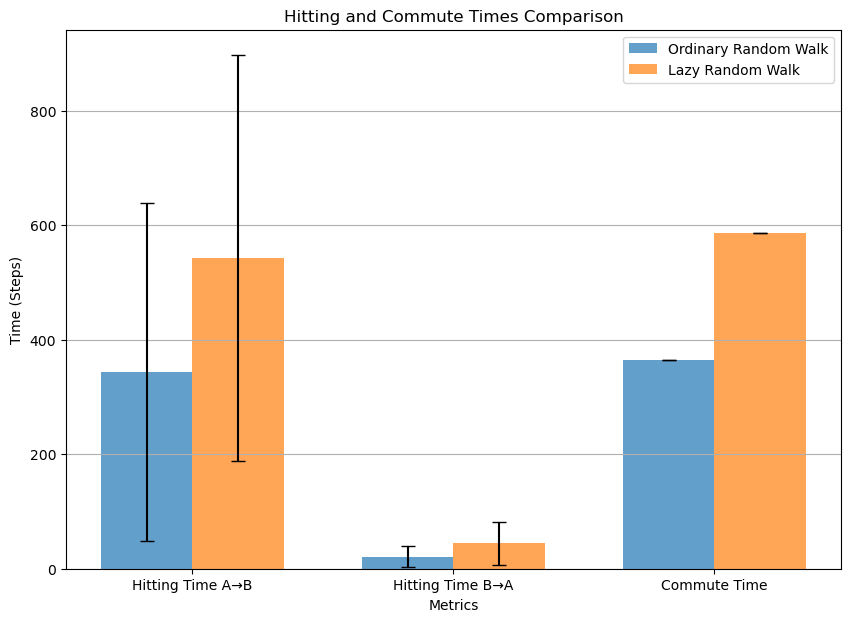

In [11]:
# Compute Hitting and Commute Times

# Ordinary Random Walk
hitting_time_ab_ord, std_ab_ord = simulate_hitting_time(G, node_a, node_b)
hitting_time_ba_ord, std_ba_ord = simulate_hitting_time(G, node_b, node_a)
commute_time_ord = hitting_time_ab_ord + hitting_time_ba_ord

# Lazy Random Walk
hitting_time_ab_lazy, std_ab_lazy = simulate_hitting_time_lazy(G, node_a, node_b, lazy_prob=0.5)
hitting_time_ba_lazy, std_ba_lazy = simulate_hitting_time_lazy(G, node_b, node_a, lazy_prob=0.5)
commute_time_lazy = hitting_time_ab_lazy + hitting_time_ba_lazy

# Prepare Data for Plotting
labels = ['Hitting Time A→B', 'Hitting Time B→A', 'Commute Time']
ordinary_times = [hitting_time_ab_ord, hitting_time_ba_ord, commute_time_ord]
lazy_times = [hitting_time_ab_lazy, hitting_time_ba_lazy, commute_time_lazy]
ordinary_std = [std_ab_ord, std_ba_ord, 0]  # Assuming std for commute_time_ord is negligible
lazy_std = [std_ab_lazy, std_ba_lazy, 0]    # Assuming std for commute_time_lazy is negligible

x = np.arange(len(labels))
width = 0.35  # Width of the bars

# Plotting the Results
plt.figure(figsize=(10, 7))
plt.bar(x - width/2, ordinary_times, width, yerr=ordinary_std, capsize=5, label='Ordinary Random Walk', alpha=0.7)
plt.bar(x + width/2, lazy_times, width, yerr=lazy_std, capsize=5, label='Lazy Random Walk', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Time (Steps)')
plt.title('Hitting and Commute Times Comparison')
plt.xticks(x, labels)
plt.legend()
plt.grid(axis='y')
plt.show()


Simulating walks starting from Node 22 (Cluster B)


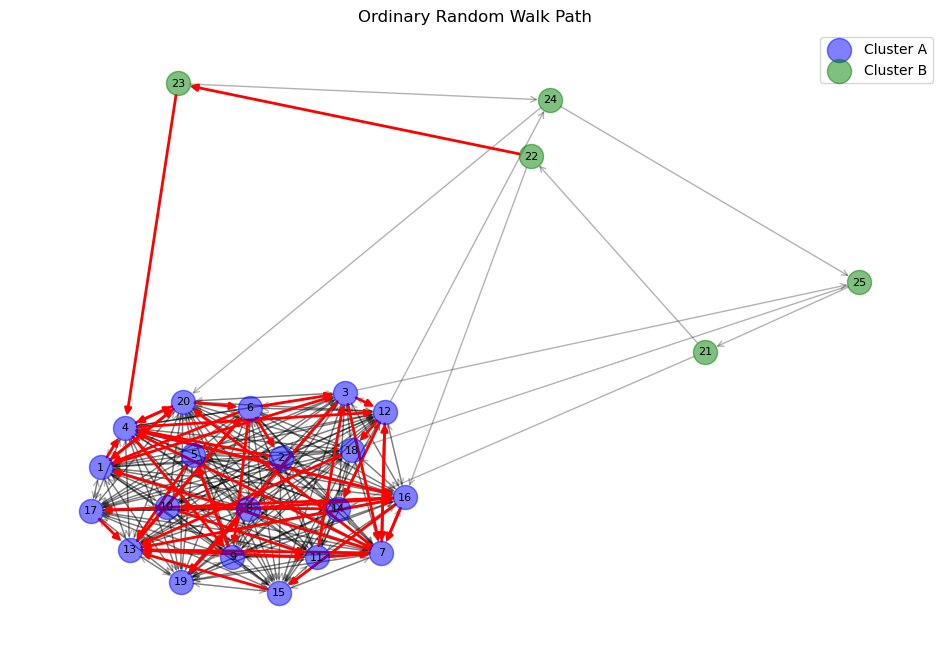

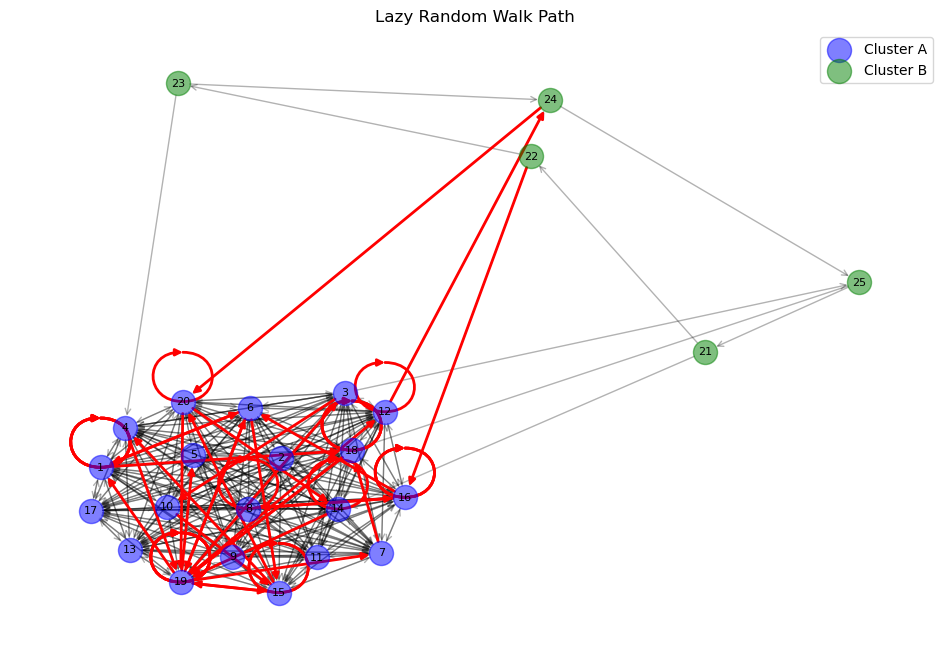

In [12]:
def simulate_random_walk(G, start_node, steps=50):
    path = [start_node]
    current_node = start_node
    for _ in range(steps):
        neighbors = list(G.successors(current_node))
        if not neighbors:
            break
        current_node = random.choice(neighbors)
        path.append(current_node)
    return path

def simulate_random_walk_lazy(G, start_node, lazy_prob=0.5, steps=50):
    path = [start_node]
    current_node = start_node
    for _ in range(steps):
        if random.random() < lazy_prob:
            path.append(current_node)  # Stay at the same node
            continue
        neighbors = list(G.successors(current_node))
        if not neighbors:
            break
        current_node = random.choice(neighbors)
        path.append(current_node)
    return path

# Select a start node from Cluster B
start_node = random.choice(list(cluster_b_nodes))
print(f"Simulating walks starting from Node {start_node} (Cluster B)")

# Simulate Ordinary Random Walk
path_ord = simulate_random_walk(G, start_node)

# Simulate Lazy Random Walk
path_lazy = simulate_random_walk_lazy(G, start_node, lazy_prob=0.5)

# Function to highlight paths on the graph
def plot_walk_path(G, path, title):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx_nodes(G, pos, nodelist=cluster_a_nodes, node_color='blue', alpha=0.5, label='Cluster A')
    nx.draw_networkx_nodes(G, pos, nodelist=cluster_b_nodes, node_color='green', alpha=0.5, label='Cluster B')
    nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', arrowsize=10, alpha=0.3)
    # Highlight the path
    path_edges = list(zip(path[:-1], path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, arrows=True)
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title(title)
    plt.legend()
    plt.axis('off')
    plt.show()

# Plotting the paths
plot_walk_path(G, path_ord, 'Ordinary Random Walk Path')
plot_walk_path(G, path_lazy, 'Lazy Random Walk Path')


Why Did Ordinary PageRank Converge Faster in Graph 1?

- **Graph Structure**: The graph had strong connectivity within Cluster A and sparse connectivity in Cluster B, with bidirectional bridging edges.

- **Impact on Random Walks**: In such a graph, the ordinary random walk moves quickly due to high connectivity, especially within Cluster A.

- **Lazy Random Walk Effect**: Introducing laziness (probability of staying at the same node) can slow down the convergence in graphs that are already well-connected because it reduces the movement across nodes.

Why Did Lazy PageRank Converge Faster in Graph 2?

- **Dangling Nodes (9, 10, 11, 12, 13, 14):** Lazy PageRank mitigates the need to redistribute ranks uniformly across the graph, reducing global computation.

- **Disconnected Components ({1, 2, 3, 4} and {5, 6, 7, 8}):** Lazy PageRank keeps rank localized longer within components, accelerating local convergence.

- **Strong Local Clusters:** Nodes within clusters (e.g., {1, 2, 3, 4}) strongly reinforce ranks among themselves, stabilizing faster in Lazy PageRank due to reduced inter-cluster rank dispersion.

- **Reduced Teleportation Effect:** Lazy PageRank limits excessive jumping to unrelated nodes, allowing ranks to stabilize more efficiently in dense substructures.

In a simple random walk on a graph, the transition probability from node $ i $ to node $ j $ is given by the transition matrix $ P $, where $ P_{ij} = \frac{1}{\text{deg}(i)} $ if there is an edge between $ i $ and $ j $, and 0 otherwise. This means that at each time step $ t $, the probability distribution $ \pi_t $ evolves according to:

$
\pi_{t+1} = \pi_t P.
$

In a lazy random walk, the walker has a probability $ \alpha $ of staying at the current node and a probability $ (1 - \alpha) $ of moving to a neighboring node. The transition matrix $ P_{\text{lazy}} $ for the lazy random walk is therefore:

$
P_{\text{lazy}} = \alpha I + (1 - \alpha) P,
$

where $ I $ is the identity matrix. This modification introduces self-loops at each node with probability $ \alpha $.

At time $ t+1 $, the probability distribution $ \pi_{t+1} $ in the lazy random walk evolves as:

$
\pi_{t+1} = \pi_t P_{\text{lazy}} = \alpha \pi_t I + (1 - \alpha) \pi_t P = \alpha \pi_t + (1 - \alpha) \pi_t P.
$

**Observation:** The key difference between the lazy random walk and the simple random walk is the inclusion of the term $ \alpha \pi_t $, representing the probability of the walker staying at the current node. This self-loop slows down the convergence of the walk compared to the simple random walk because the probability distribution changes more gradually over time.

---


Given the PageRank transition matrix:

$
P_g = (1 - p) P + p B,
$

where $ P $ is a stochastic matrix, $ B = \frac{1}{n} \mathbf{1}_{n \times n} $ is a matrix where each entry is $ \frac{1}{n} $, and $ p $ is the damping factor (typically $ p = 0.15 $).

To prove that $ P_g $ remains stochastic, we need to show two things:

1. **Non-negativity:** All entries of $ P_g $ are non-negative.
2. **Row sums equal to 1:** The sum of each row in $ P_g $ is 1.

**Proof:**

1. **Non-negativity:**
   - Since $ P $ is stochastic, $ P_{ij} \geq 0 $ for all $ i, j $.
   - Since $ B_{ij} = \frac{1}{n} \geq 0 $ for all $ i, j $.
   - The coefficients $ (1 - p) $ and $ p $ are non-negative (since $ p \in [0,1] $).
   - Therefore, $ P_g $ entries are non-negative:
     $
     P_g[i][j] = (1 - p) P[i][j] + p B[i][j] \geq 0.
     $

2. **Row sums equal to 1:**
   - For each row $ i $:
     $
     \sum_{j} P_g[i][j] = (1 - p) \sum_{j} P[i][j] + p \sum_{j} B[i][j].
     $
   - Since $ P $ is stochastic:
     $
     \sum_{j} P[i][j] = 1.
     $
   - Since $ B[i][j] = \frac{1}{n} $:
     $
     \sum_{j} B[i][j] = n \times \frac{1}{n} = 1.
     $
   - Therefore:
     $
     \sum_{j} P_g[i][j] = (1 - p)(1) + p(1) = 1.
     $

**Conclusion:** Since $ P_g $ has non-negative entries and each row sums to 1, $ P_g $ remains a stochastic matrix.

# Centrality Measures

- Which nodes have the most connections?
- Which nodes influence others the most?
- Which nodes are critical for network communication?

## Centrality Measures

### Facebook Dataset

This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks. 

In [13]:
# Path to dataset
file_path = "./data/facebook_combined.txt"

# Load the graph as an undirected graph
G = nx.read_edgelist(file_path, nodetype=int, delimiter=' ')

# Number of nodes and edges
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Check if the graph is connected (for undirected graphs)
if nx.is_connected(G):
    print("The graph is connected.")
else:
    print("The graph is not connected.")


Number of nodes: 4039
Number of edges: 88234
The graph is connected.


### Visualize Graph

Let's take a look at the original grpah and then, using community-detection algorithms, look at a summarized version of the graph with supernodes.

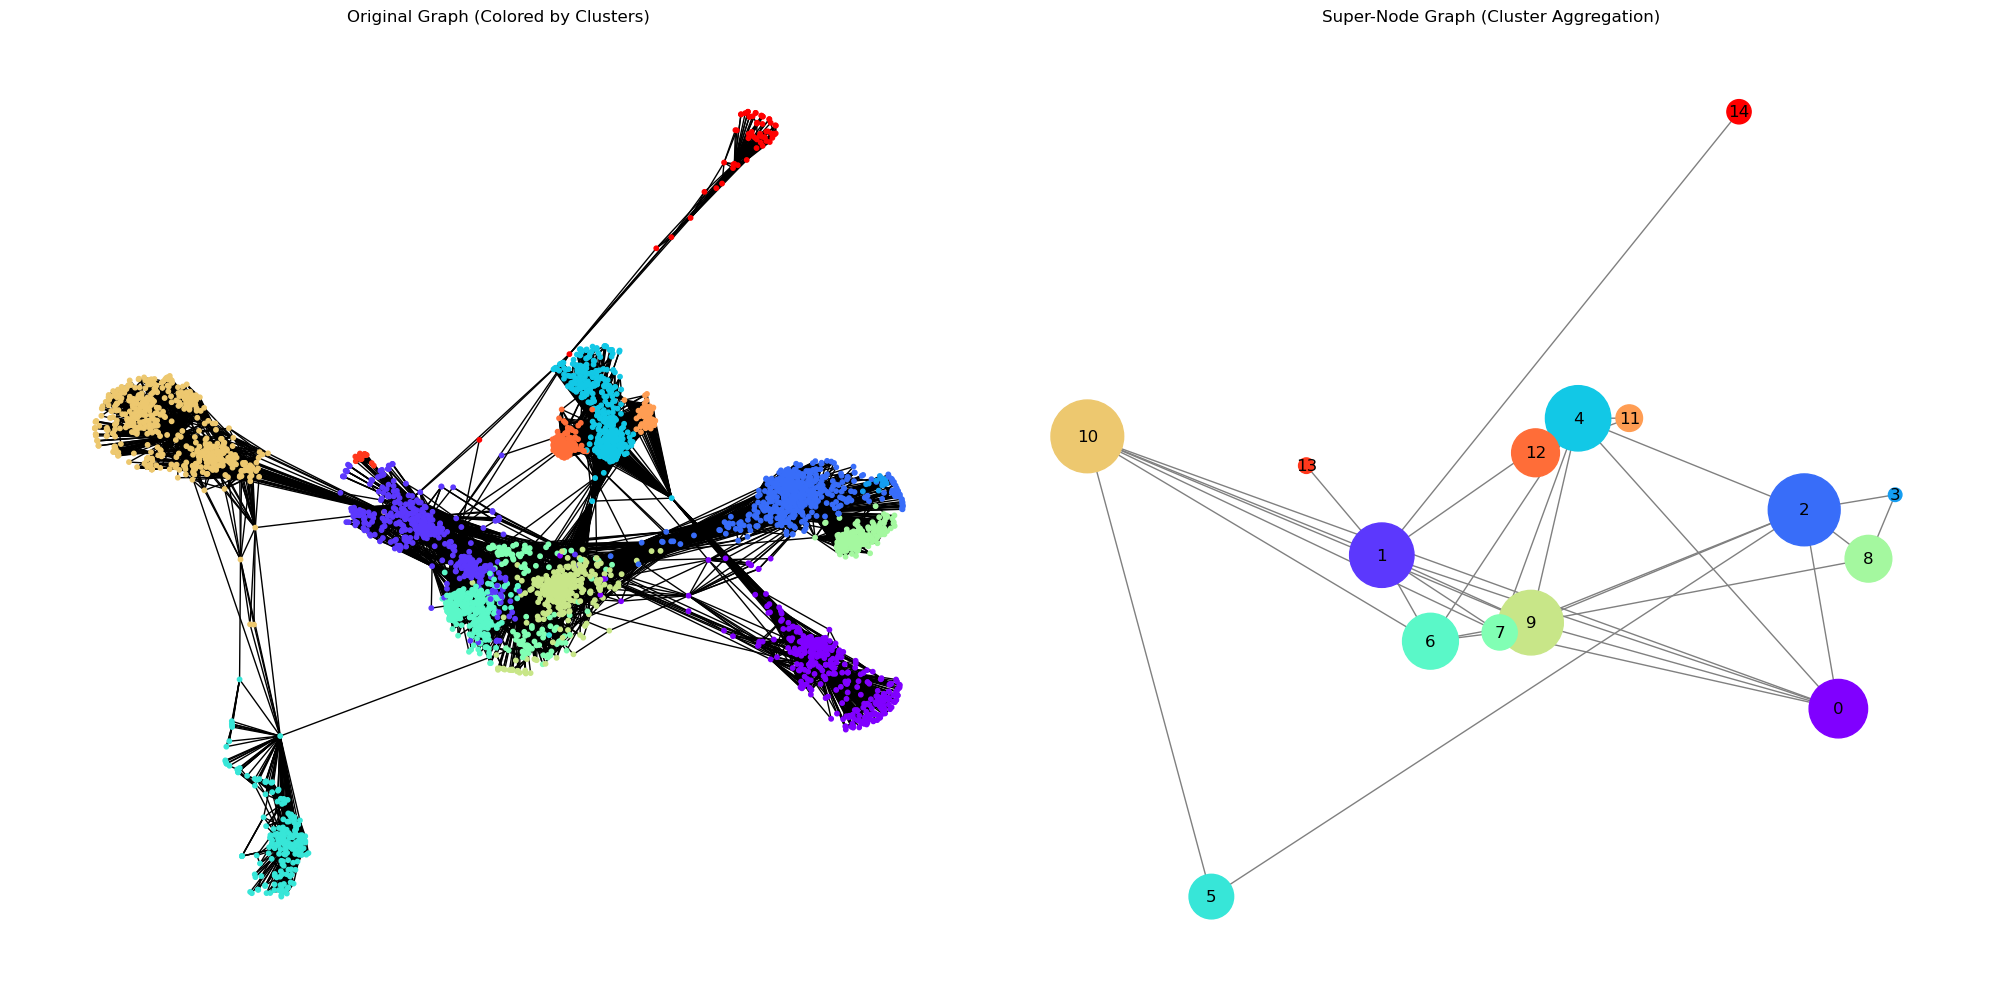

In [14]:
# Step 1: Detect Communities
partition = community_louvain.best_partition(G, random_state=42)

# Step 2: Create a Super-Node Graph
super_graph = nx.Graph()

# Group nodes by their cluster
clusters = defaultdict(list)
for node, cluster_id in partition.items():
    clusters[cluster_id].append(node)

# Add super-nodes and edges
for cluster_id, nodes in clusters.items():
    super_graph.add_node(cluster_id, size=len(nodes))

for u, v in G.edges():
    cluster_u = partition[u]
    cluster_v = partition[v]
    if cluster_u != cluster_v:
        super_graph.add_edge(cluster_u, cluster_v)

# Step 3: Generate a consistent layout
# Layout for the original graph
pos_original = nx.spring_layout(G)

# Layout for the super-node graph (average positions of clusters)
pos_super = {}
for cluster_id, nodes in clusters.items():
    # Compute the average position of nodes in the cluster
    cluster_positions = np.array([pos_original[node] for node in nodes])
    pos_super[cluster_id] = cluster_positions.mean(axis=0)

# Step 4: Visualize Both Graphs Side-by-Side with Consistent Layout
plt.figure(figsize=(20, 10))

# Subplot 1: Original Graph
plt.subplot(1, 2, 1)
original_node_colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos=pos_original, node_color=original_node_colors, cmap=plt.cm.rainbow, node_size=10, with_labels=False)
plt.title("Original Graph (Colored by Clusters)")

# Subplot 2: Super-Node Graph
plt.subplot(1, 2, 2)
node_sizes = [super_graph.nodes[n]['size'] * 5 for n in super_graph.nodes]
super_node_colors = [partition[next(iter(clusters[cluster_id]))] for cluster_id in super_graph.nodes()]  # Match cluster colors
nx.draw(super_graph, pos=pos_super, node_color=super_node_colors, cmap=plt.cm.rainbow, node_size=node_sizes, with_labels=True, edge_color='gray')
plt.title("Super-Node Graph (Cluster Aggregation)")

# Show the plots
plt.tight_layout()
plt.show()


### Identify Globally Influential Nodes and Their Communities

**Goal**: Use global centrality measures (e.g., eigenvector centrality, betweenness centrality) to identify the most influential nodes in the entire graph and their corresponding communities.

**Steps**:

- Compute eigenvector centrality for the entire graph to find nodes connected to other influential nodes.
- Compute betweenness centrality to identify nodes acting as bridges across communities.
- Focus on the top N nodes (e.g., top 5 by eigenvector and betweenness centrality) and examine the communities they belong to:
    - Which clusters (super-nodes) are they part of?
    - Are these influential nodes concentrated in specific clusters, or are they distributed across the network?

**Questions to Explore**:

- Are globally influential nodes always within the largest communities, or can smaller communities have key players?
- Do these nodes connect multiple communities, or are they isolated within one?

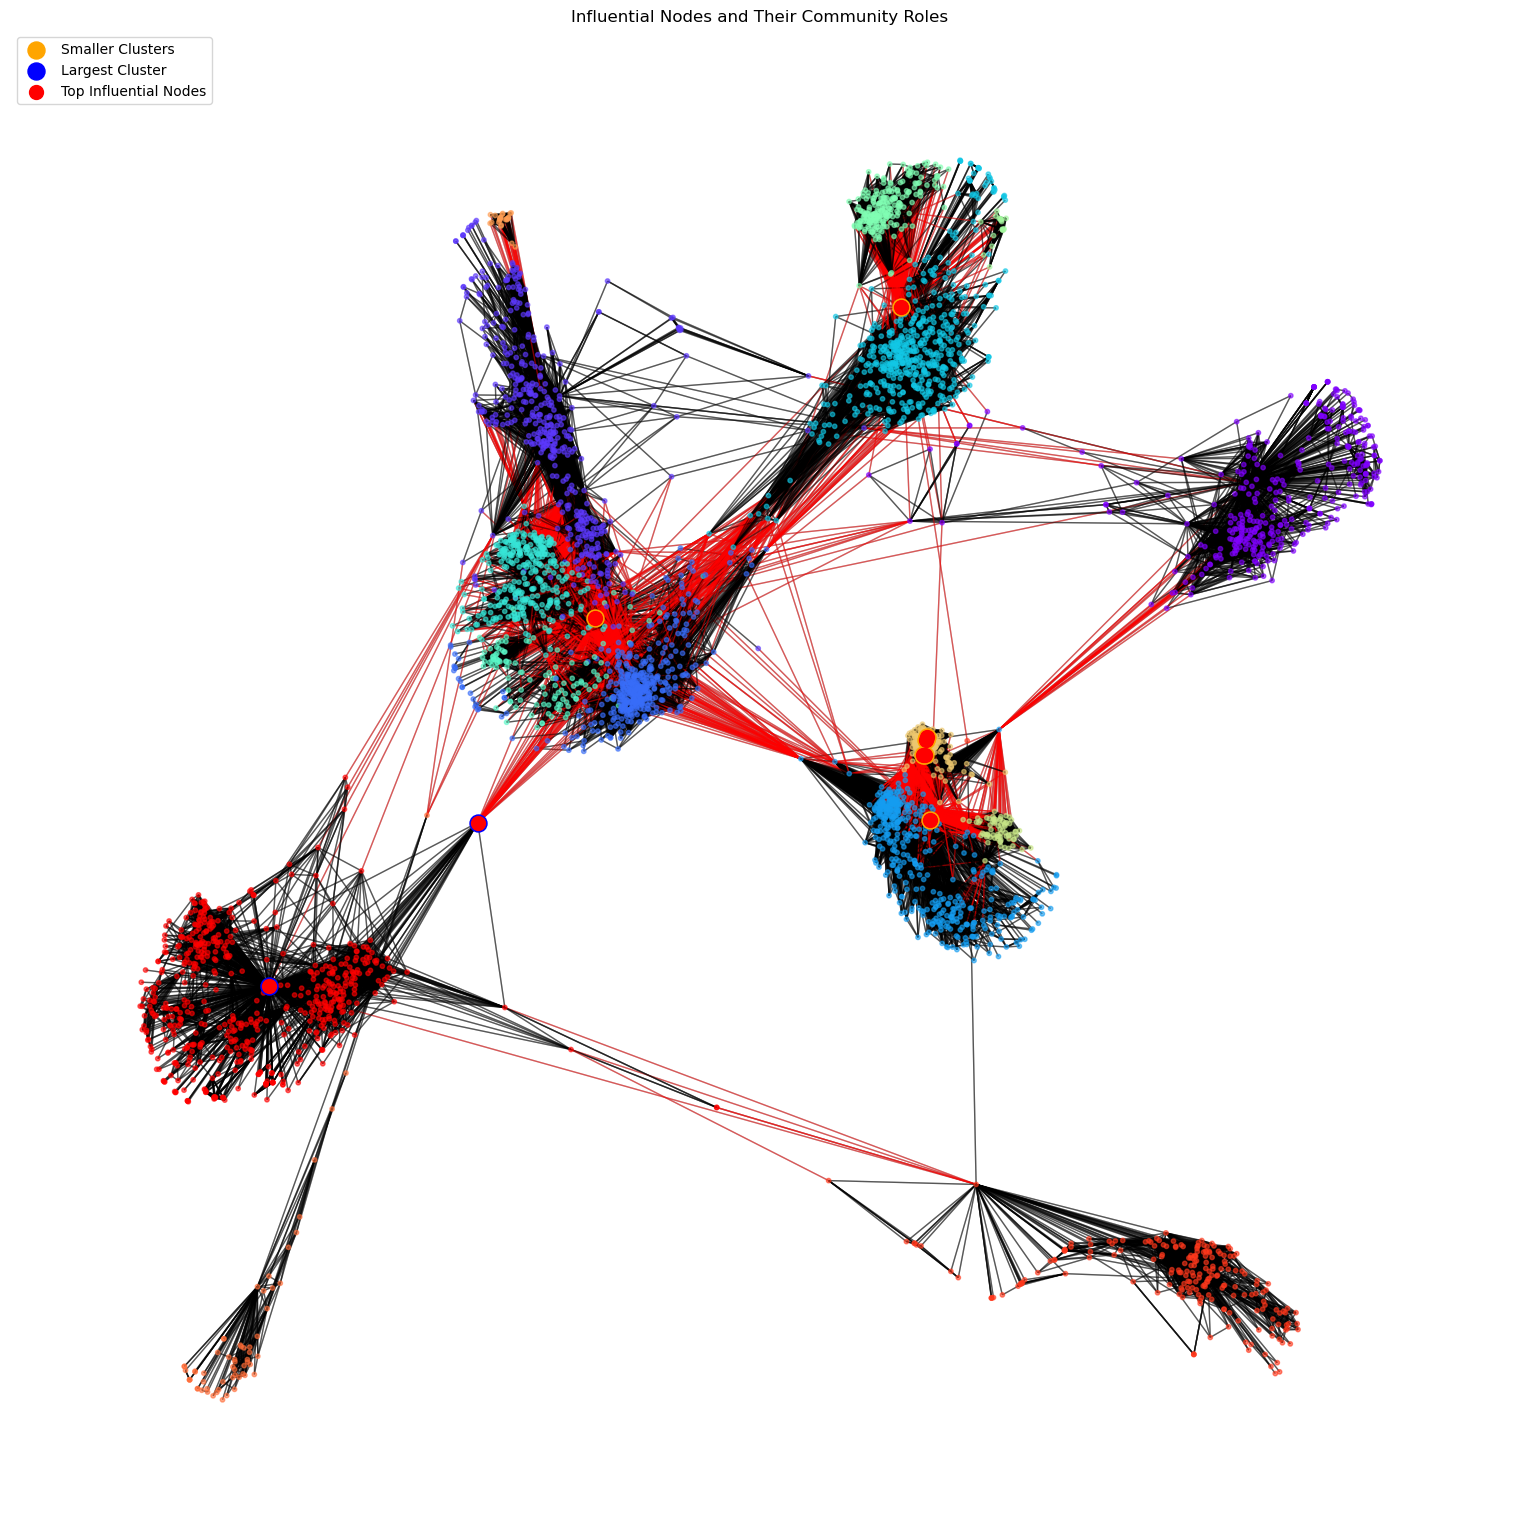

Which clusters (super-nodes) are the top influential nodes part of?
{2464: 10, 107: 2, 3437: 14, 1684: 4, 1912: 3, 2233: 10, 2266: 10, 1085: 14, 2206: 10}

Are these influential nodes concentrated in specific clusters or distributed?
Concentration per cluster:
{10: [2464, 2233, 2266, 2206], 2: [107], 14: [3437, 1085], 4: [1684], 3: [1912]}

Are globally influential nodes always within the largest communities?
Largest cluster ID: 14, Size: 548
Nodes in the largest cluster: [3437, 1085]
Nodes in smaller clusters: [2464, 107, 1684, 1912, 2233, 2266, 2206]

Do these nodes connect multiple communities?
Nodes involved in inter-community edges (red edges) are shown in the visualization.


In [15]:
# Step 1: Compute centrality measures
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
betweenness_centrality = nx.betweenness_centrality(G)

# Step 2: Identify top N influential nodes by eigenvector and betweenness centrality
N = 5
top_eigenvector_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:N]
top_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:N]

# Combine top nodes
top_nodes = set([node for node, _ in top_eigenvector_nodes] + [node for node, _ in top_betweenness_nodes])

# Step 3: Perform community detection
partition = community_louvain.best_partition(G)

# Map top nodes to their clusters
top_node_clusters = {node: partition[node] for node in top_nodes}

# Visualize the graph and explicitly answer questions
pos = nx.spring_layout(G)

# Define cluster sizes
cluster_sizes = defaultdict(int)
for cluster_id in partition.values():
    cluster_sizes[cluster_id] += 1

# Identify the largest cluster
largest_cluster_id = max(cluster_sizes, key=cluster_sizes.get)

# Visualization
plt.figure(figsize=(15, 15))

# 1. Plot the entire graph
node_colors = [partition[node] for node in G.nodes()]
nx.draw(
    G,
    pos,
    node_color=node_colors,
    cmap=plt.cm.rainbow,
    node_size=10,
    with_labels=False,
    edge_color="gray",
    alpha=0.6,
)

# 2. Highlight top nodes without repeated legend entries
top_nodes_drawn = False
largest_cluster_drawn = False
smaller_cluster_drawn = False

for node in top_nodes:
    cluster_id = partition[node]
    if cluster_id == largest_cluster_id:
        nx.draw_networkx_nodes(
            G,
            pos,
            nodelist=[node],
            node_color="blue",
            node_size=150,
            label="Largest Cluster" if not largest_cluster_drawn else None,
        )
        largest_cluster_drawn = True
    else:
        nx.draw_networkx_nodes(
            G,
            pos,
            nodelist=[node],
            node_color="orange",
            node_size=150,
            label="Smaller Clusters" if not smaller_cluster_drawn else None,
        )
        smaller_cluster_drawn = True

if not top_nodes_drawn:
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=top_nodes,
        node_color="red",
        node_size=100,
        label="Top Influential Nodes",
    )
    top_nodes_drawn = True

# 3. Highlight inter-community connections
edge_colors = ["black" if partition[u] == partition[v] else "red" for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.5)

plt.title("Influential Nodes and Their Community Roles")
plt.legend(loc="upper left")
plt.show()

# Answer the questions explicitly
print("Which clusters (super-nodes) are the top influential nodes part of?")
print(top_node_clusters)

print("\nAre these influential nodes concentrated in specific clusters or distributed?")
print("Concentration per cluster:")
cluster_distribution = defaultdict(list)
for node, cluster in top_node_clusters.items():
    cluster_distribution[cluster].append(node)
print(dict(cluster_distribution))

print("\nAre globally influential nodes always within the largest communities?")
print(f"Largest cluster ID: {largest_cluster_id}, Size: {cluster_sizes[largest_cluster_id]}")
print("Nodes in the largest cluster:", [node for node, cluster in top_node_clusters.items() if cluster == largest_cluster_id])
print("Nodes in smaller clusters:", [node for node, cluster in top_node_clusters.items() if cluster != largest_cluster_id])

print("\nDo these nodes connect multiple communities?")
print("Nodes involved in inter-community edges (red edges) are shown in the visualization.")


**Observations**:

- We can identify globally influential nodes using eigenvector centrality and betweenness centrality and then examine the communities they belong to.
- Most globally influential nodes belong to community 11, the rest are individually connected to other communities.
- Most globally influential nodes are not part of the largest community, but are distributed across the network in smaller communities.
- Red edges in the graph show connections between globally influential nodes and nodes from other communities in the network.

### Evaluate the Role of Communities in Global Connectivity

**Goal**: Transition from analyzing individual nodes to global vs. local community structure, focusing on how communities contribute to the overall graph structure and connectivity.


**Steps**:

1. Treat each cluster as a super-node (as already visualized).
2. Compute inter-community edge density:
    - Measure the proportion of edges between clusters relative to the total edges in the graph.
    - Identify which clusters (super-nodes) are most critical for maintaining global connectivity.
3. Compute intra-community edge density for each cluster:
    - Measure how tightly connected the nodes within each community are.
4. Compare results:
    - Are some communities highly self-contained with strong internal cohesion (high intra-density but low inter-density)?
    - Are others acting as "bridges" to multiple clusters, contributing more to the global structure?

**Questions to Explore**  
- How does the removal of one community (e.g., its super-node) affect global connectivity?
- Which communities are key for maintaining the graph’s integrity (e.g., the largest connected component)?

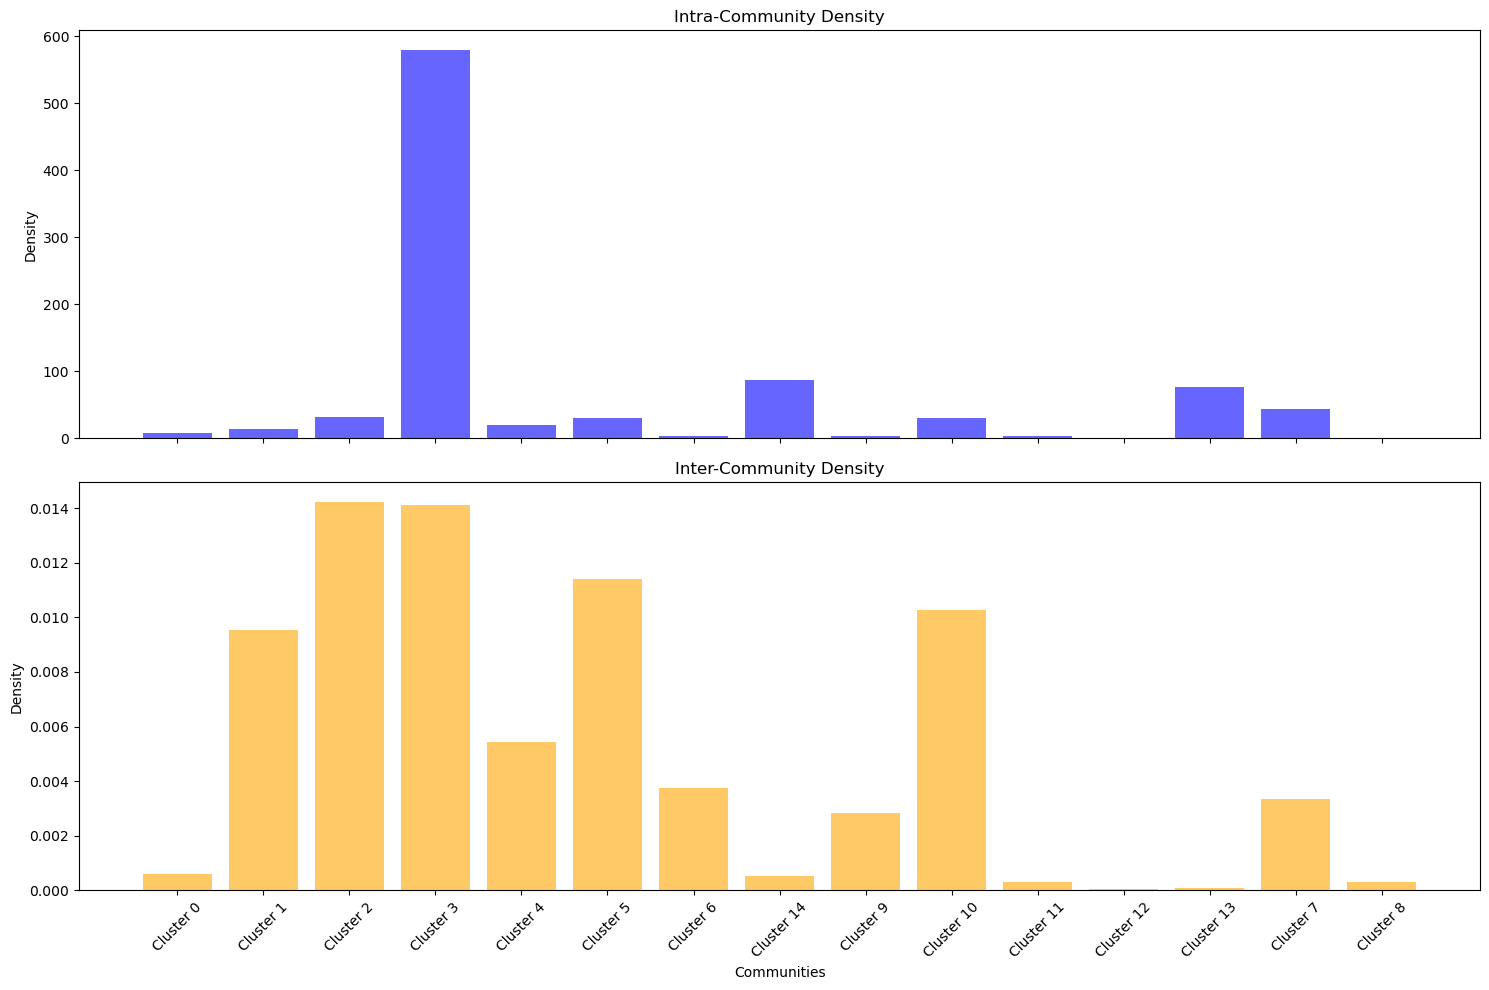

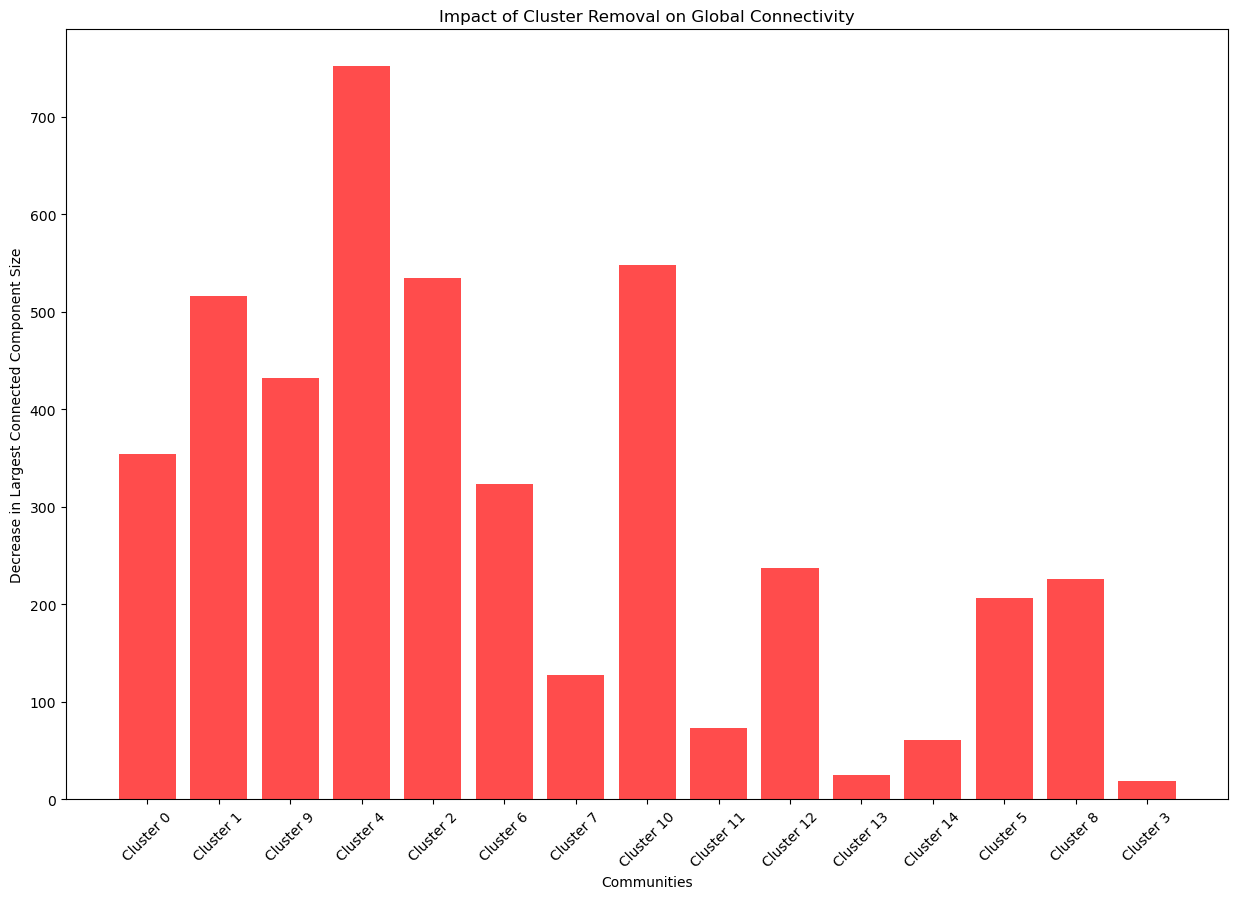

1. How does the removal of one community affect global connectivity?
Removing Cluster 0 reduces the largest connected component by 354 nodes.
Removing Cluster 1 reduces the largest connected component by 516 nodes.
Removing Cluster 9 reduces the largest connected component by 432 nodes.
Removing Cluster 4 reduces the largest connected component by 752 nodes.
Removing Cluster 2 reduces the largest connected component by 535 nodes.
Removing Cluster 6 reduces the largest connected component by 323 nodes.
Removing Cluster 7 reduces the largest connected component by 128 nodes.
Removing Cluster 10 reduces the largest connected component by 548 nodes.
Removing Cluster 11 reduces the largest connected component by 73 nodes.
Removing Cluster 12 reduces the largest connected component by 237 nodes.
Removing Cluster 13 reduces the largest connected component by 25 nodes.
Removing Cluster 14 reduces the largest connected component by 61 nodes.
Removing Cluster 5 reduces the largest connected comp

In [16]:
# 1. Treat each cluster as a super-node and compute inter/intra-community edges
cluster_edges = defaultdict(lambda: {'intra': 0, 'inter': 0})
total_edges = len(G.edges())

for u, v in G.edges():
    cluster_u = partition[u]
    cluster_v = partition[v]
    if cluster_u == cluster_v:
        cluster_edges[cluster_u]['intra'] += 1
    else:
        cluster_edges[cluster_u]['inter'] += 1
        cluster_edges[cluster_v]['inter'] += 1

# Normalize edge counts by the number of nodes in each community
intra_density = {cluster: (data['intra']+1) / (1+len(clusters[cluster])) for cluster, data in cluster_edges.items()}
inter_density = {cluster: (data['inter']+1) / (1+total_edges) for cluster, data in cluster_edges.items()}

# Identify the largest connected component after community removal
global_connectivity_impact = {}
original_lcc_size = len(max(nx.connected_components(G), key=len))

for cluster_id in clusters.keys():
    # Remove all nodes in this cluster
    G_temp = G.copy()
    G_temp.remove_nodes_from(clusters[cluster_id])
    lcc_size = len(max(nx.connected_components(G_temp), key=len))
    global_connectivity_impact[cluster_id] = original_lcc_size - lcc_size

# Visualize inter and intra-community densities with vertically stacked bar plots
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Intra-community density
axes[0].bar(range(len(intra_density)), list(intra_density.values()), color='blue', alpha=0.6)
axes[0].set_title("Intra-Community Density")
axes[0].set_ylabel("Density")
axes[0].set_xticks(range(len(intra_density)))
axes[0].set_xticklabels([f"Cluster {i}" for i in intra_density.keys()], rotation=45)

# Inter-community density
axes[1].bar(range(len(inter_density)), list(inter_density.values()), color='orange', alpha=0.6)
axes[1].set_title("Inter-Community Density")
axes[1].set_xlabel("Communities")
axes[1].set_ylabel("Density")
axes[1].set_xticks(range(len(inter_density)))
axes[1].set_xticklabels([f"Cluster {i}" for i in inter_density.keys()], rotation=45)

plt.tight_layout()
plt.show()

# Visualize the impact of removing clusters
plt.figure(figsize=(15, 10))
plt.bar(range(len(global_connectivity_impact)), list(global_connectivity_impact.values()), color='red', alpha=0.7)
plt.xticks(range(len(global_connectivity_impact)), [f"Cluster {i}" for i in global_connectivity_impact.keys()], rotation=45)
plt.title("Impact of Cluster Removal on Global Connectivity")
plt.xlabel("Communities")
plt.ylabel("Decrease in Largest Connected Component Size")
plt.show()

# Answer questions explicitly
print("1. How does the removal of one community affect global connectivity?")
for cluster, impact in global_connectivity_impact.items():
    print(f"Removing Cluster {cluster} reduces the largest connected component by {impact} nodes.")

print("\n2. Which communities are key for maintaining the graph's integrity?")
critical_clusters = [cluster for cluster, impact in global_connectivity_impact.items() if impact > 0.1 * original_lcc_size]
print(f"Critical communities are: {critical_clusters} (contributing significantly to global connectivity).")


**Obversations**:

- Clusters with high intra-community density (e.g., Cluster 8) have strong internal connectivity but contribute minimally to inter-community interactions, whereas clusters with higher inter-community density (e.g., Cluster 3 and Cluster 11) play a significant role in connecting different parts of the network.
- Clusters with high intra-community density (e.g., Cluster 8) have strong internal connectivity but less impact on global connectivity when removed, as they primarily maintain localized interactions. Conversely, clusters with high inter-community density (e.g., Cluster 4 and Cluster 10) are crucial for connecting different communities, as their removal significantly disrupts the largest connected component.
- 5 communities contribute significantly to global connectivity because of their high inter-community edge density, acting as bridges between different parts of the network.


### Investigate Centrality Dynamics Across Communities
**Goal**: Analyze how local centralities within a community differ from their impact on the global graph.

**Steps**:

1. For each community:
    - Compute local centralities (e.g., degree, clustering coefficient) restricted to the community.
    - Identify nodes that are central within their community but not globally significant.

2. Compare the global and local roles:
    - Nodes with high local centrality but low global centrality might indicate community leaders (important locally but not globally).
    - Nodes with both high local and global centrality are critical hubs (important for both local and global connectivity).

3. Visualize:
    - Highlight nodes in each cluster based on their local vs. global roles:
    - Add labels to nodes that act as bridges between clusters (from Step 2).

**Questions to Explore**:
- Are global hubs also the most central nodes locally, or do local and global roles diverge?
- Which clusters are dominated by local-only influencers, and which have globally important nodes?

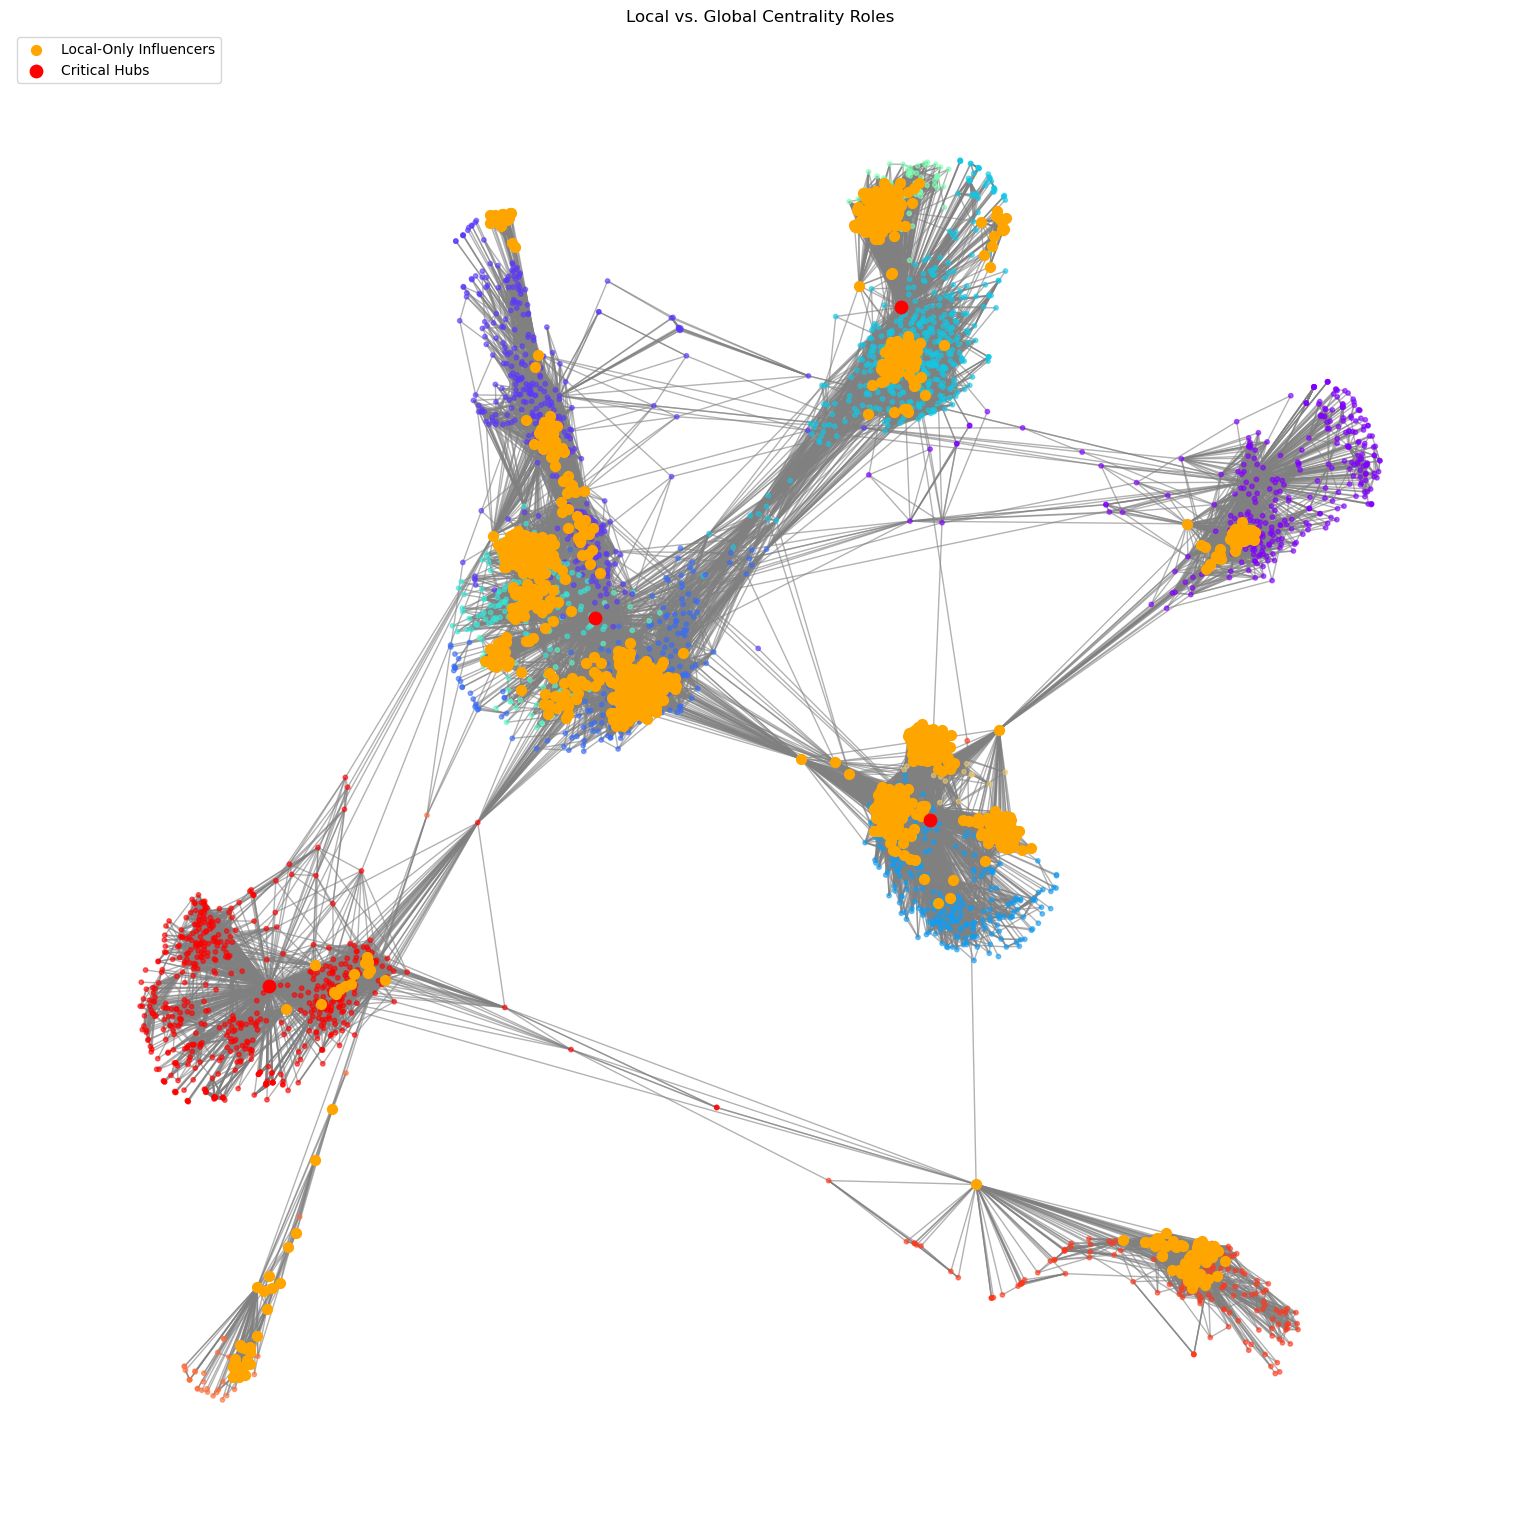

1. Are global hubs also the most central nodes locally, or do local and global roles diverge?
Cluster 0:
  Critical Hubs: []
  Number of Local-Only Influencers: 40
Cluster 1:
  Critical Hubs: []
  Number of Local-Only Influencers: 81
Cluster 2:
  Critical Hubs: [107]
  Number of Local-Only Influencers: 265
Cluster 3:
  Critical Hubs: [1912]
  Number of Local-Only Influencers: 183
Cluster 4:
  Critical Hubs: [1684]
  Number of Local-Only Influencers: 106
Cluster 5:
  Critical Hubs: []
  Number of Local-Only Influencers: 177
Cluster 6:
  Critical Hubs: []
  Number of Local-Only Influencers: 71
Cluster 14:
  Critical Hubs: [3437]
  Number of Local-Only Influencers: 15
Cluster 9:
  Critical Hubs: []
  Number of Local-Only Influencers: 73
Cluster 10:
  Critical Hubs: []
  Number of Local-Only Influencers: 209
Cluster 11:
  Critical Hubs: []
  Number of Local-Only Influencers: 25
Cluster 12:
  Critical Hubs: []
  Number of Local-Only Influencers: 29
Cluster 13:
  Critical Hubs: []
  Number o

In [17]:
# Group nodes by their cluster from the partition
clusters = defaultdict(list)
for node, cluster_id in partition.items():
    clusters[cluster_id].append(node)

# 1. Compute local centralities for each community
local_centralities = {}
for cluster_id, nodes in clusters.items():
    # Create a subgraph for the current community
    community_subgraph = G.subgraph(nodes)
    local_centralities[cluster_id] = {
        "degree": nx.degree_centrality(community_subgraph),
        "clustering": nx.clustering(community_subgraph),
    }

# 2. Compare local and global roles
global_degree_centrality = nx.degree_centrality(G)
global_clustering_coefficient = nx.clustering(G)

# Identify nodes with high local centrality but low global centrality (local influencers)
local_only_influencers = defaultdict(list)
critical_hubs = defaultdict(list)

for cluster_id, nodes in clusters.items():
    for node in nodes:
        # Define thresholds to identify significant nodes
        local_degree = local_centralities[cluster_id]["degree"].get(node, 0)
        global_degree = global_degree_centrality.get(node, 0)
        local_clustering = local_centralities[cluster_id]["clustering"].get(node, 0)
        global_clustering = global_clustering_coefficient.get(node, 0)

        if local_degree > 0.1 and global_degree < 0.05:
            local_only_influencers[cluster_id].append(node)
        if local_degree > 0.1 and global_degree > 0.1:
            critical_hubs[cluster_id].append(node)

# Improved Visualization: Local-Only Influencers and Critical Hubs without Color Overlap
plt.figure(figsize=(15, 15))

# Plot the entire graph with default community colors for regular nodes
regular_node_colors = [partition[node] for node in G.nodes()]
nx.draw(
    G,
    pos,
    node_color=regular_node_colors,
    cmap=plt.cm.rainbow,
    node_size=10,
    with_labels=False,
    edge_color="gray",
    alpha=0.6,
)

# Highlight local-only influencers and critical hubs with distinct colors
local_influencers_drawn = False
critical_hubs_drawn = False

for cluster_id, nodes in clusters.items():
    if cluster_id in local_only_influencers and len(local_only_influencers[cluster_id]) > 0:
        nx.draw_networkx_nodes(
            G,
            pos,
            nodelist=local_only_influencers[cluster_id],
            node_color="orange",
            node_size=50,
            label="Local-Only Influencers" if not local_influencers_drawn else None,
        )
        local_influencers_drawn = True

    if cluster_id in critical_hubs and len(critical_hubs[cluster_id]) > 0:
        nx.draw_networkx_nodes(
            G,
            pos,
            nodelist=critical_hubs[cluster_id],
            node_color="red",
            node_size=80,
            label="Critical Hubs" if not critical_hubs_drawn else None,
        )
        critical_hubs_drawn = True

plt.title("Local vs. Global Centrality Roles")
plt.legend(loc="upper left")
plt.show()

# Explicitly Answer Questions
print("1. Are global hubs also the most central nodes locally, or do local and global roles diverge?")
for cluster_id in clusters.keys():
    print(f"Cluster {cluster_id}:")
    print(f"  Critical Hubs: {critical_hubs[cluster_id] if cluster_id in critical_hubs else []}")
    print(f"  Number of Local-Only Influencers: {len(local_only_influencers[cluster_id] if cluster_id in local_only_influencers else [])}")

print("\n2. Which clusters are dominated by local-only influencers, and which have globally important nodes?")
for cluster_id in clusters.keys():
    critical_count = len(critical_hubs[cluster_id]) if cluster_id in critical_hubs else 0
    local_count = len(local_only_influencers[cluster_id]) if cluster_id in local_only_influencers else 0

    if local_count > critical_count:
        print(f"Cluster {cluster_id} is dominated by local-only influencers.")
    else:
        print(f"Cluster {cluster_id} has a significant number of globally important nodes.")


Observations:

- Most communities only contain locally influential nodes, with a few exceptions. Local influential nodes are the ones which only have large number of connections within their own community.
- All communities are dominated by locally influential nodes, with a few globally influential nodes connecting them.

## HITS Algorithm


The HITS algorithm (Hyperlink-Induced Topic Search) and PageRank are both ranking algorithms, but they differ in their objectives:

- HITS computes two scores for each node:
    - Authority Score: Importance based on incoming links.
    - Hub Score: Importance based on outgoing links.
- PageRank computes a single importance score based on the link structure.

### Procedure

**Node Sampling for Visualization**
- Top-ranked nodes: Select the top 50 nodes with the highest authority, hub, and PageRank scores.
- Random sampling: Pick random samples from the graph for broader visual exploration.

**Visualizing HITS Scores**
- Create two visualizations to separately highlight:
    - Top Hubs: Nodes with high hub scores.
    - Top Authorities: Nodes with high authority scores.
- Use node size to indicate the magnitude of hub/authority scores.
- Use edge weights or colors to indicate connectivity patterns (e.g., incoming vs. outgoing links).

**Comparing HITS and PageRank**

- Scatter Plot: Create a scatter plot of nodes to highlight correlations or discrepancies between these scores.
- Top Overlap Analysis: Find and visualize the overlap between the top 50 nodes by authority, hub, and PageRank scores.

**Subgraph Exploration**

- Extract subgraphs centered around top nodes by authority, hub, and PageRank scores.
- Visualize these subgraphs to analyze differences:
    - Hubs: Outgoing connectivity patterns.
    - Authorities: Incoming connectivity patterns.
    - PageRank: General importance in the graph.

**Hypotheses to Explore**
- Are high PageRank nodes also high authorities in HITS?
    - Nodes with many incoming links are often expected to have high scores in both.
- Do high hubs have high PageRank?
    - Since PageRank focuses on overall importance, this might not always correlate with hubs.
- Do top nodes (authorities, hubs, PageRank) form dense clusters or act as bridges?
    - Extract subgraphs for top nodes and analyze their clustering and connectivity patterns.

### Dataset

In this section, we will use the 'NotreDame' dataset, which is a web graph from the Notre Dame university domain. We will use the HITS algorithm to identify the most authoritative and hub nodes in the graph. We will also compare the results with the PageRank algorithm.

In [18]:
# Path to dataset
file_path = "./data/web-NotreDame.txt"

# Load the graph as an undirected graph
G = nx.read_edgelist(file_path, nodetype=int, delimiter='\t', create_using=nx.DiGraph)

# Number of nodes and edges
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print()

# Extract k-core of the graph
k = 12
G.remove_edges_from(nx.selfloop_edges(G))
G_kcore = nx.k_core(G, k)
# Number of nodes and edges
print("Number of nodes in the k-core:", G_kcore.number_of_nodes())
print("Number of edges in the k-core:", G_kcore.number_of_edges())
print()

# Extract the largest SCC
largest_scc = max(nx.strongly_connected_components(G_kcore), key=len)
G_scc = G_kcore.subgraph(largest_scc).copy()

# Number of nodes and edges
print("Number of nodes:", G_scc.number_of_nodes())
print("Number of edges:", G_scc.number_of_edges())
print()

Number of nodes: 325729
Number of edges: 1497134

Number of nodes in the k-core: 24202
Number of edges in the k-core: 714017

Number of nodes: 3562
Number of edges: 45677



### Analysis

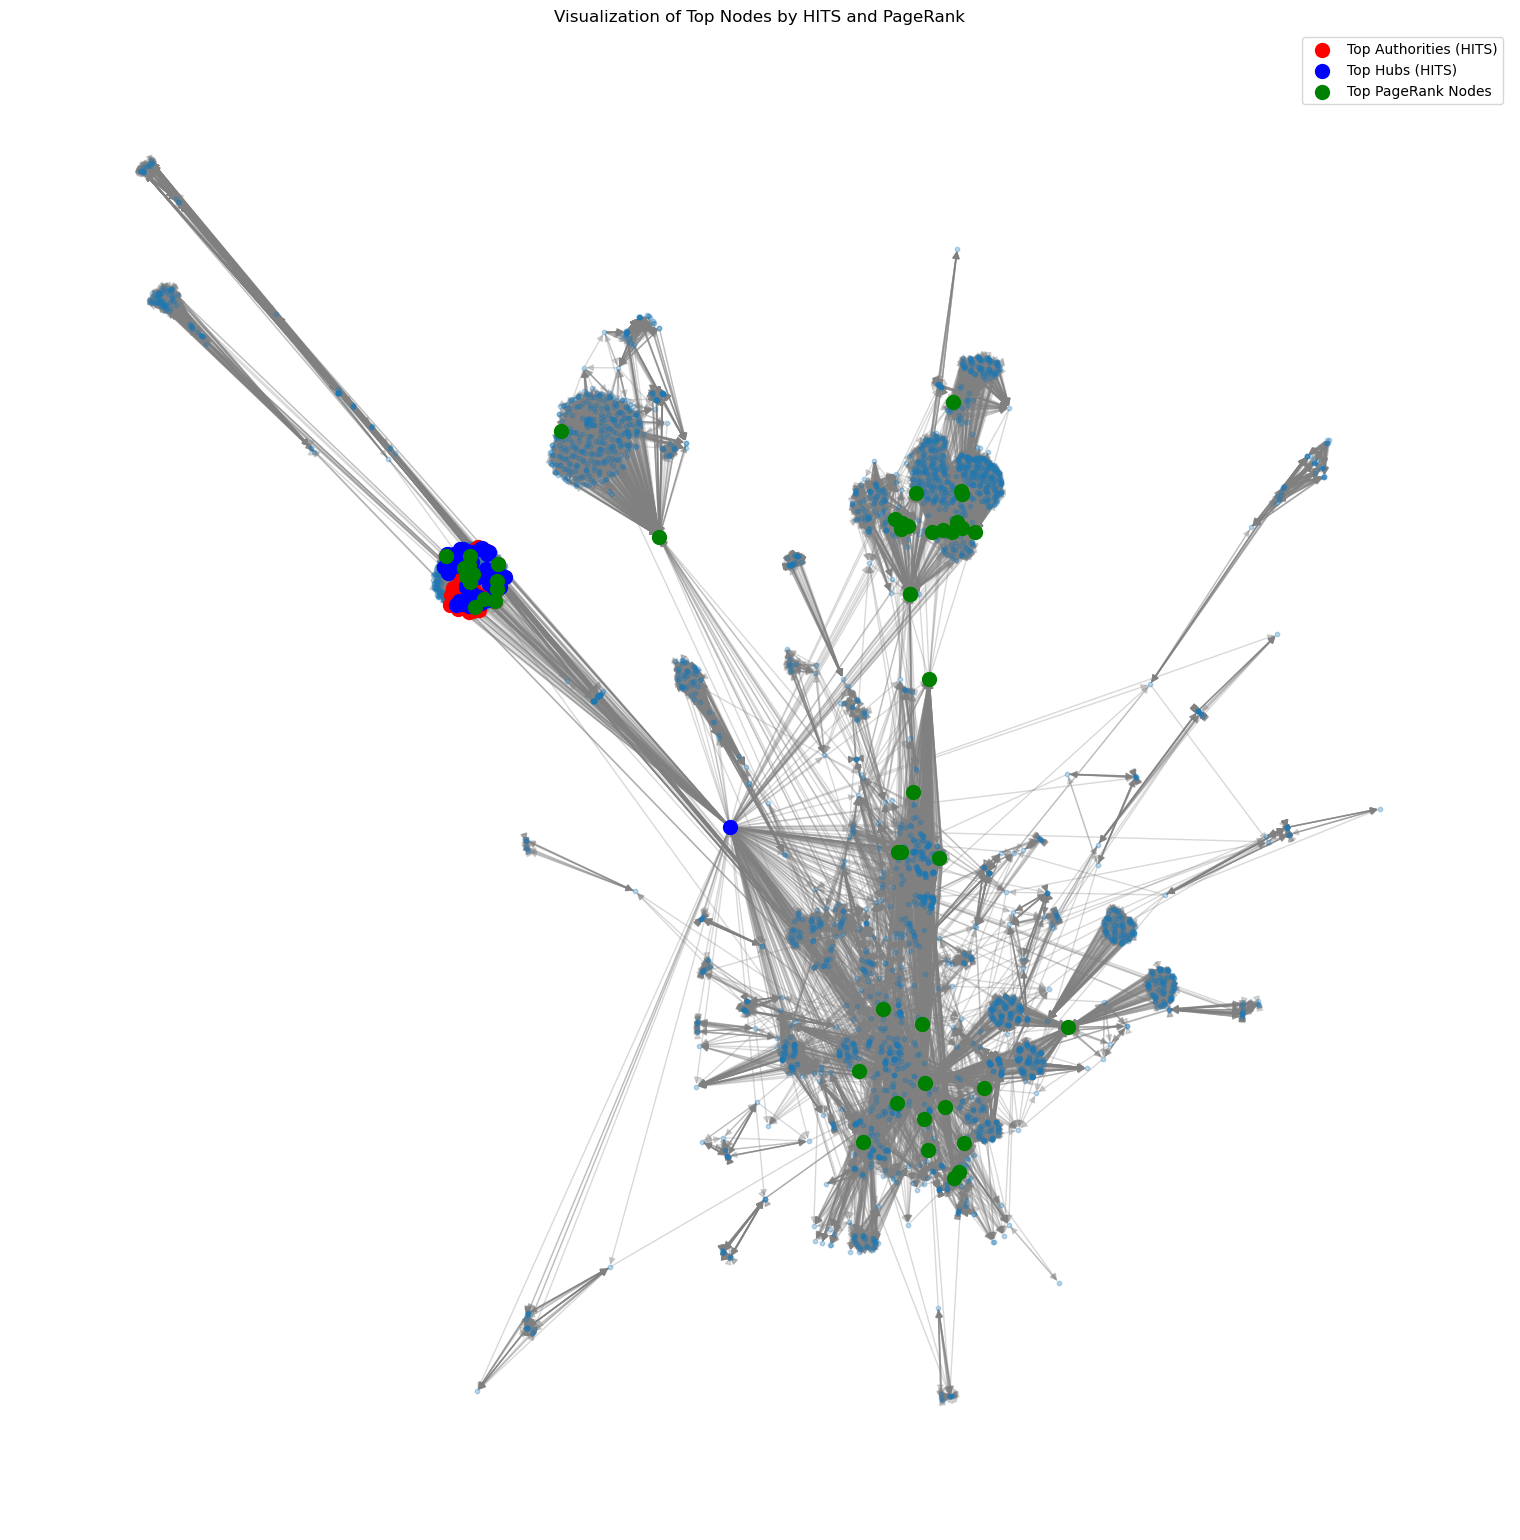

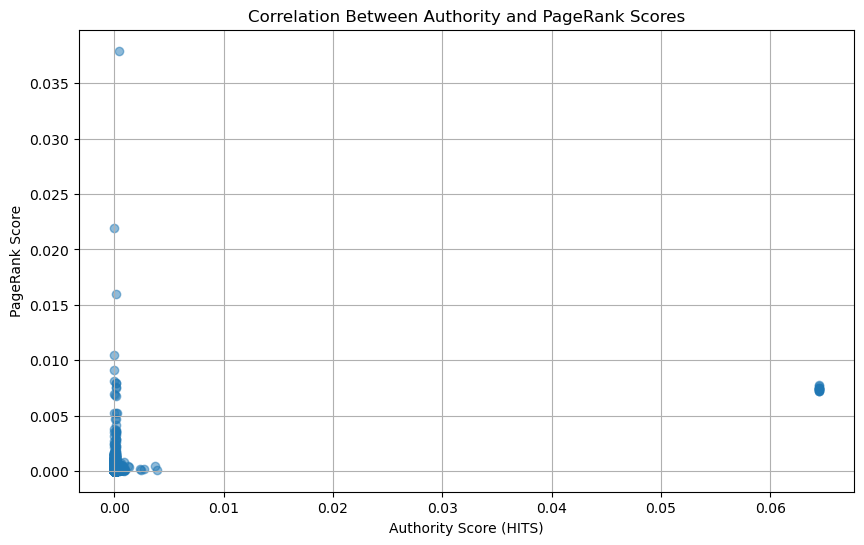

1. Are high PageRank nodes also high authorities in HITS?
Number of overlapping nodes between top authorities and PageRank: 13
Nodes: {25766, 25767, 25768, 25734, 25735, 25799, 25800, 25805, 25774, 25723, 25722, 25787, 25788}

2. Are high hubs correlated with high PageRank?
Number of overlapping nodes between top hubs and PageRank: 0
Nodes: set()

3. Do top nodes (authorities, hubs, PageRank) form dense clusters or act as bridges?
Number of nodes in authority subgraph: 50
Number of nodes in hub subgraph: 50
Number of nodes in PageRank subgraph: 50


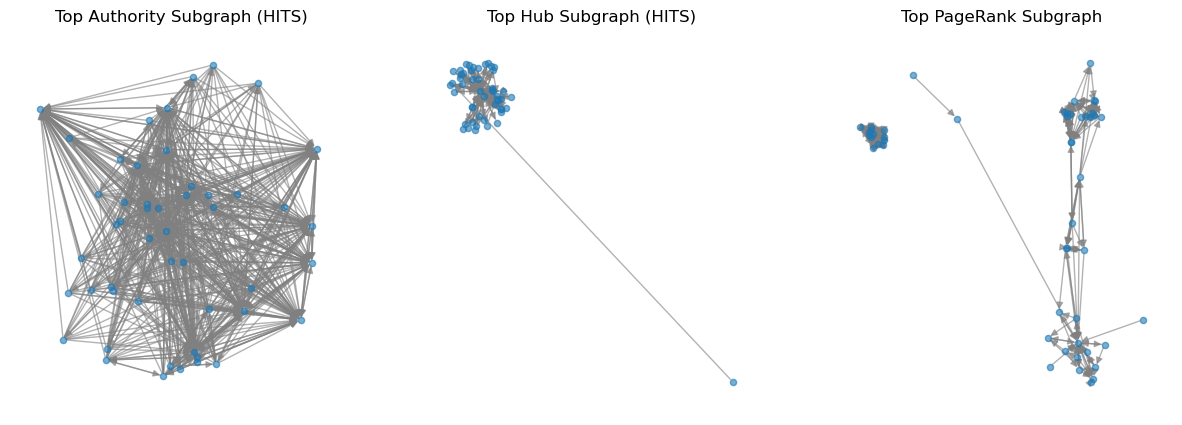

In [19]:
# Step 2: Compute HITS and PageRank
# Compute HITS scores
hits_scores = nx.hits(G_scc, max_iter=1000)
authority_scores = hits_scores[1]
hub_scores = hits_scores[0]
# Compute PageRank scores
pagerank_scores = nx.pagerank(G_scc)

# Step 3: Select Top 50 Nodes by each metric
N = 50
top_authorities = sorted(authority_scores.items(), key=lambda x: x[1], reverse=True)[:N]
top_hubs = sorted(hub_scores.items(), key=lambda x: x[1], reverse=True)[:N]
top_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:N]
# Combine all top nodes
top_nodes = set([node for node, _ in top_authorities + top_hubs + top_pagerank])
# Map scores for visualization
authority_dict = dict(top_authorities)
hub_dict = dict(top_hubs)
pagerank_dict = dict(top_pagerank)

# Step 4: Visualizations and Answers
pos = nx.spring_layout(G_scc)
# Visualization 1: Highlight Top Nodes in Graph
plt.figure(figsize=(15, 15))
# Regular graph visualization
nx.draw(G_scc, pos, node_size=10, edge_color="gray", alpha=0.3, with_labels=False)
# Highlight top authorities
nx.draw_networkx_nodes(
    G_scc,
    pos,
    nodelist=authority_dict.keys(),
    node_color="red",
    node_size=100,
    label="Top Authorities (HITS)",
)
# Highlight top hubs
nx.draw_networkx_nodes(
    G_scc,
    pos,
    nodelist=hub_dict.keys(),
    node_color="blue",
    node_size=100,
    label="Top Hubs (HITS)",
)
# Highlight top PageRank nodes
nx.draw_networkx_nodes(
    G_scc,
    pos,
    nodelist=pagerank_dict.keys(),
    node_color="green",
    node_size=100,
    label="Top PageRank Nodes",
)
plt.legend(loc="upper right")
plt.title("Visualization of Top Nodes by HITS and PageRank")
plt.show()
# Scatter Plot: Authority vs. PageRank
authority_scores_full = list(authority_scores.values())
pagerank_scores_full = list(pagerank_scores.values())
plt.figure(figsize=(10, 6))
plt.scatter(authority_scores_full, pagerank_scores_full, alpha=0.5)
plt.xlabel("Authority Score (HITS)")
plt.ylabel("PageRank Score")
plt.title("Correlation Between Authority and PageRank Scores")
plt.grid(True)
plt.show()
# Overlap Analysis
overlap_authority_pagerank = set(authority_dict.keys()) & set(pagerank_dict.keys())
overlap_hub_pagerank = set(hub_dict.keys()) & set(pagerank_dict.keys())

# Answers to Questions
print("1. Are high PageRank nodes also high authorities in HITS?")
print(
    f"Number of overlapping nodes between top authorities and PageRank: {len(overlap_authority_pagerank)}"
)
print(f"Nodes: {overlap_authority_pagerank}")

print("\n2. Are high hubs correlated with high PageRank?")
print(
    f"Number of overlapping nodes between top hubs and PageRank: {len(overlap_hub_pagerank)}"
)
print(f"Nodes: {overlap_hub_pagerank}")

print(
    "\n3. Do top nodes (authorities, hubs, PageRank) form dense clusters or act as bridges?"
)
# Extract subgraphs centered around top nodes for each metric
authority_subgraph = G_scc.subgraph(authority_dict.keys())
hub_subgraph = G_scc.subgraph(hub_dict.keys())
pagerank_subgraph = G_scc.subgraph(pagerank_dict.keys())

print(f"Number of nodes in authority subgraph: {authority_subgraph.number_of_nodes()}")
print(f"Number of nodes in hub subgraph: {hub_subgraph.number_of_nodes()}")
print(f"Number of nodes in PageRank subgraph: {pagerank_subgraph.number_of_nodes()}")

# Visualize subgraph densities
plt.figure(figsize=(15, 5))

# Authority subgraph
plt.subplot(1, 3, 1)
nx.draw(
    authority_subgraph,
    pos,
    node_size=20,
    edge_color="gray",
    alpha=0.6,
    with_labels=False,
)
plt.title("Top Authority Subgraph (HITS)")

# Hub subgraph
plt.subplot(1, 3, 2)
nx.draw(
    hub_subgraph, pos, node_size=20, edge_color="gray", alpha=0.6, with_labels=False
)
plt.title("Top Hub Subgraph (HITS)")

# PageRank subgraph
plt.subplot(1, 3, 3)
nx.draw(
    pagerank_subgraph,
    pos,
    node_size=20,
    edge_color="gray",
    alpha=0.6,
    with_labels=False,
)
plt.title("Top PageRank Subgraph")

plt.show()

**Observations**:

-  The top authorities (red), hubs (blue), and PageRank nodes (green) are distributed across distinct regions of the graph. Notably, the top hubs and authorities seem to dominate separate densely connected regions, while PageRank nodes often lie at the intersection of influential subgraphs, suggesting their importance in bridging multiple communities.
- The top nodes (hubs, authorities, and PageRank) are critical for maintaining inter-community connectivity. The visualization highlights these nodes as central to their respective regions, with many outgoing and incoming connections, further supporting their roles as structural anchors or bridges in the directed web graph.
- There is no correlation between PageRank and HITS scores, as high PageRank nodes are not necessarily high authorities or hubs. This indicates that globally important nodes (PageRank) may not be the most influential in terms of incoming or outgoing links in local contexts (HITS).
- The top authority subgraph exhibits a densely interconnected structure, highlighting its role in receiving many inbound links, while the top hub subgraph shows a sparse, elongated structure, indicating its role in directing outbound links to diverse regions. The top PageRank subgraph demonstrates a mix of dense local connections and long-range links, emphasizing its importance in both local influence and global reach within the graph.


### Ego Network Analysis

Local vs. Global Influence and Structural Significance of Top Nodes:
Top Authority (25767):
  Betweenness Centrality: 0.0
  Clustering Coefficient: 0.04853007875314394
  Degree: 540
Top Hub (7137):
  Betweenness Centrality: 0.3264725961435668
  Clustering Coefficient: 0.02118964376830766
  Degree: 412
Top PageRank (0):
  Betweenness Centrality: 0.6448385560912919
  Clustering Coefficient: 0.010363530866066248
  Degree: 1091


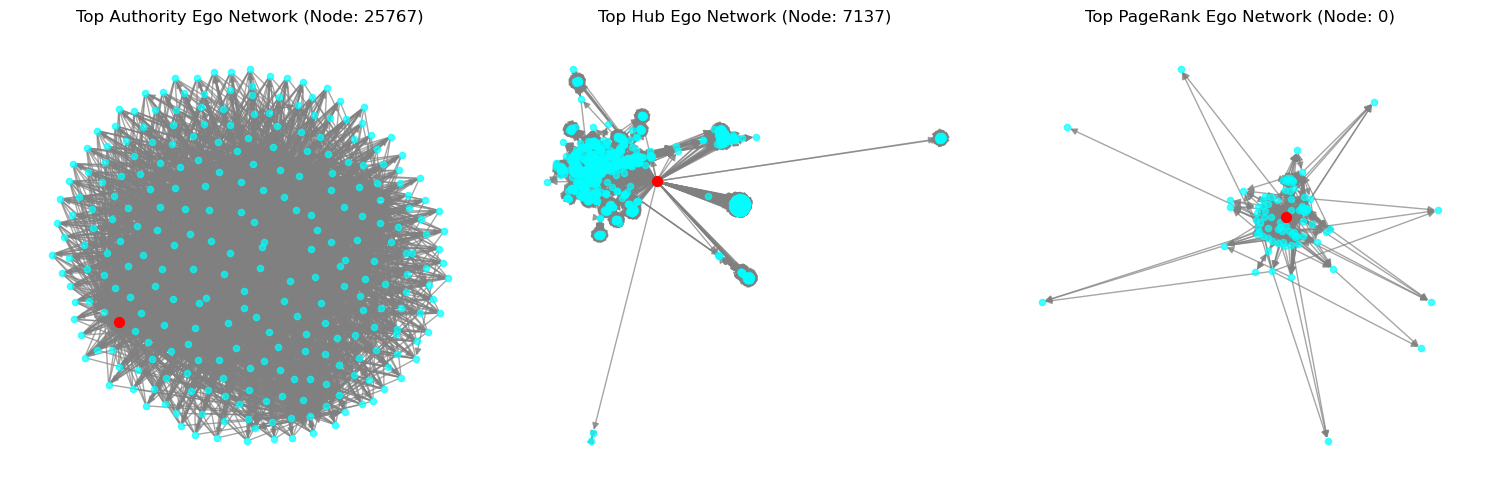

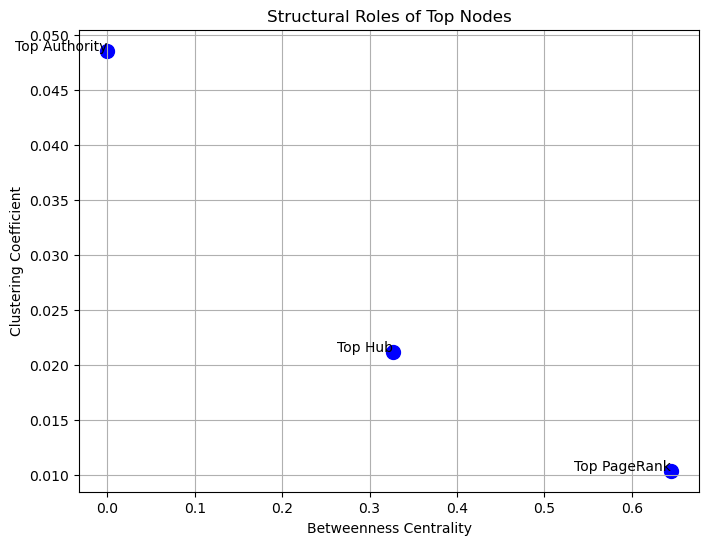

In [20]:
# Compute Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G_scc)

# Compute Clustering Coefficients
clustering_coefficients = nx.clustering(G_scc)

# Extract properties for top nodes (authority, hub, pagerank)
top_authority_node = top_authorities[0][0]
top_hub_node = top_hubs[0][0]
top_pagerank_node = top_pagerank[0][0]

top_nodes = {
    "Top Authority": top_authority_node,
    "Top Hub": top_hub_node,
    "Top PageRank": top_pagerank_node,
}

# Analyze and print local/global influence and structural significance
analysis_results = {}
for role, node in top_nodes.items():
    analysis_results[role] = {
        "Betweenness Centrality": betweenness_centrality.get(node, 0),
        "Clustering Coefficient": clustering_coefficients.get(node, 0),
        "Degree": G_scc.degree[node],
    }

print("Local vs. Global Influence and Structural Significance of Top Nodes:")
for role, metrics in analysis_results.items():
    print(f"{role} ({top_nodes[role]}):")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

# Visualize Neighborhoods and Influence
plt.figure(figsize=(15, 5))

for i, (role, node) in enumerate(top_nodes.items(), 1):
    ego_network = nx.ego_graph(G_scc, node, radius=2)
    pos = nx.spring_layout(ego_network)
    plt.subplot(1, 3, i)
    nx.draw(
        ego_network,
        pos,
        node_color="cyan",
        node_size=20,
        edge_color="gray",
        with_labels=False,
        alpha=0.7,
    )
    nx.draw_networkx_nodes(
        ego_network,
        pos,
        nodelist=[node],
        node_color="red",
        node_size=50,
        label=f"{role} Node",
    )
    plt.title(f"{role} Ego Network (Node: {node})")

plt.tight_layout()
plt.show()

# Visualize Correlation between Betweenness Centrality and Clustering Coefficient for Top Nodes
betweenness_values = [
    metrics["Betweenness Centrality"] for metrics in analysis_results.values()
]
clustering_values = [
    metrics["Clustering Coefficient"] for metrics in analysis_results.values()
]

plt.figure(figsize=(8, 6))
plt.scatter(betweenness_values, clustering_values, color="blue", s=100)
for i, role in enumerate(top_nodes.keys()):
    plt.text(
        betweenness_values[i],
        clustering_values[i],
        role,
        fontsize=10,
        ha="right",
        color="black",
    )
plt.xlabel("Betweenness Centrality")
plt.ylabel("Clustering Coefficient")
plt.title("Structural Roles of Top Nodes")
plt.grid(True)
plt.show()

1. **Top Authority Ego Network (Node: 25787)**:
   - The ego network is densely interconnected, with most nodes directly linked to the central authority node. This structure reflects its role as a primary target for inbound links, suggesting high credibility or importance as a source of information.
   - The uniform distribution of links indicates that the top authority's influence stems from a broad and well-connected community, emphasizing its global reach within its neighborhood.

2. **Top Hub Ego Network (Node: 7137)**:
   - The hub ego network displays a star-like structure, with the central hub node directing links outward to many other nodes. It acts as a connector, facilitating access to various regions in the graph.
   - The sparsity and elongated connections indicate that the hub links to a diverse set of less-interconnected nodes, reinforcing its role as a distribution point for information.

3. **Top PageRank Ego Network (Node: 0)**:
   - The PageRank ego network balances features of both the authority and hub networks, with a mix of dense local connections and long-range outbound links. This suggests its dual role in consolidating local influence while maintaining global importance.
   - The central node has direct connections to many nodes but also serves as a bridge to other less-dense regions, highlighting its significance in overall graph connectivity and navigation.

Community Impact Analysis of Top Nodes:
Top Authority (25767):
  Community ID: 41
  Community Size: 531
  Community Density: 0.027765341292683793
  Inter-Community Edges: 326
Top Hub (7137):
  Community ID: 41
  Community Size: 531
  Community Density: 0.027765341292683793
  Inter-Community Edges: 326
Top PageRank (0):
  Community ID: 0
  Community Size: 252
  Community Density: 0.04954784038449377
  Inter-Community Edges: 277


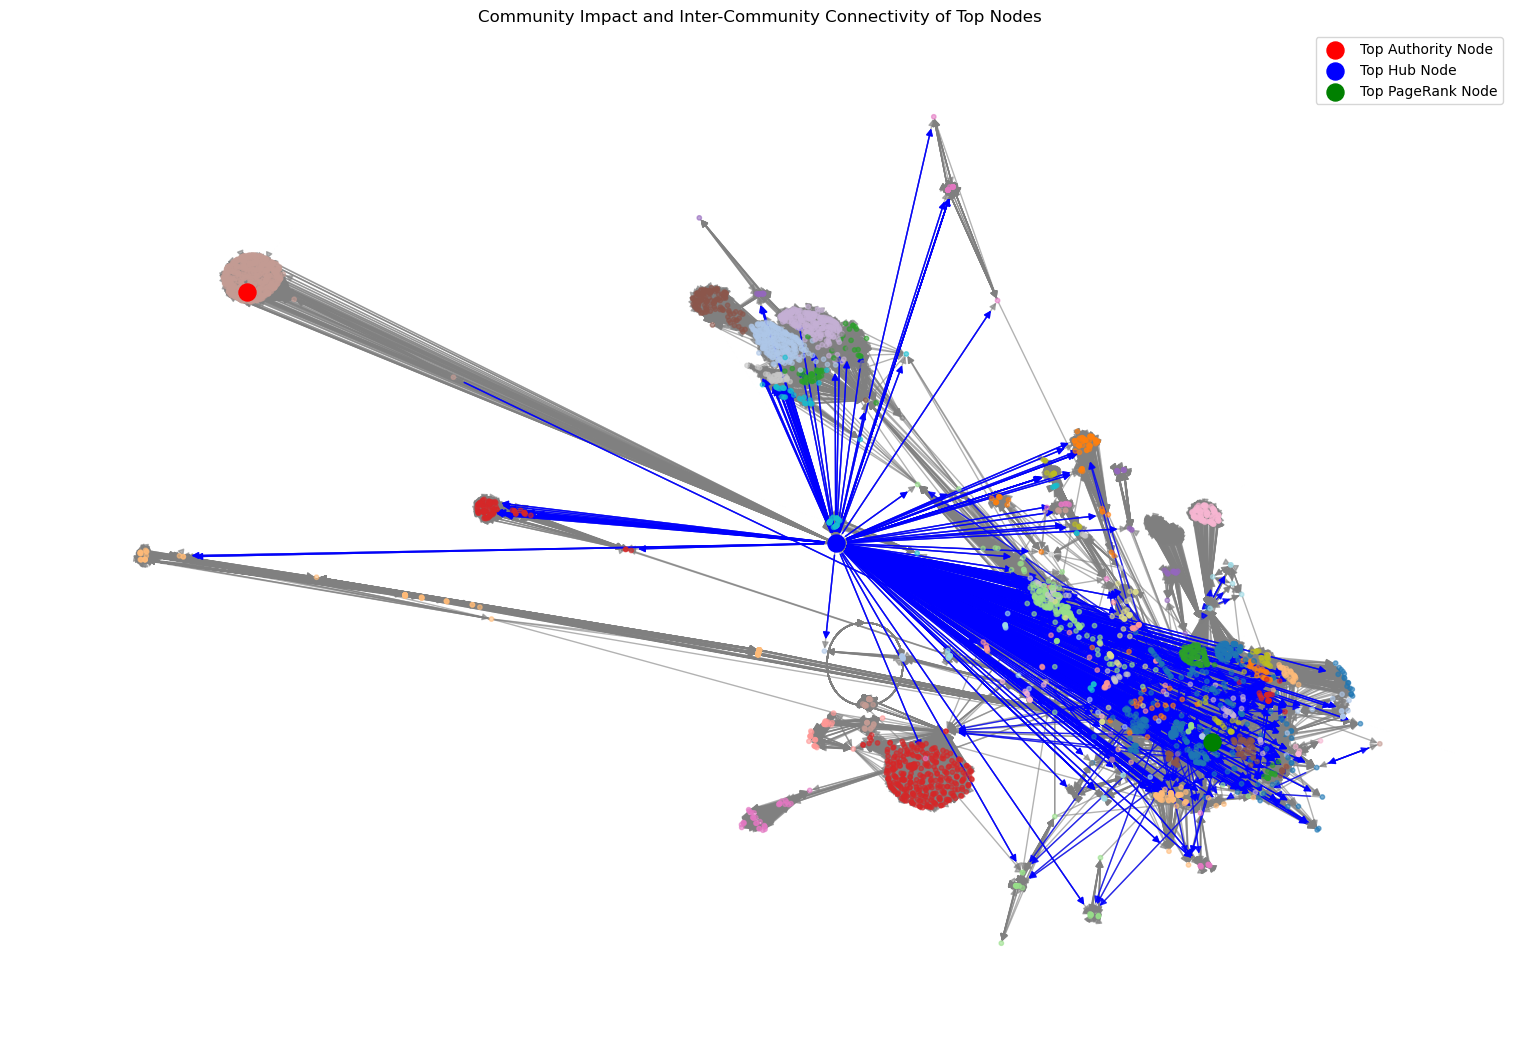

In [21]:
# Compute communities using Label Propagation for directed graphs
communities = nx.community.asyn_lpa_communities(G_scc.to_undirected(), weight="weight")

# Map nodes to their community IDs
partition = {}
for community_id, nodes in enumerate(communities):
    for node in nodes:
        partition[node] = community_id


# Group nodes by community
communities = defaultdict(list)
for node, comm in partition.items():
    communities[comm].append(node)

# Analyze top nodes' communities
top_nodes = {
    "Top Authority": top_authorities[0][0],
    "Top Hub": top_hubs[0][0],
    "Top PageRank": top_pagerank[0][0],
}

community_analysis = {}
for role, node in top_nodes.items():
    community_id = partition[node]
    community_nodes = communities[community_id]
    community_subgraph = G_scc.subgraph(community_nodes)
    community_density = nx.density(community_subgraph)
    inter_community_edges = sum(
        1 for u, v in G_scc.edges(community_nodes) if partition[u] != partition[v]
    )

    community_analysis[role] = {
        "Community ID": community_id,
        "Community Size": len(community_nodes),
        "Community Density": community_density,
        "Inter-Community Edges": inter_community_edges,
    }

# Print analysis results
print("Community Impact Analysis of Top Nodes:")
for role, metrics in community_analysis.items():
    print(f"{role} ({top_nodes[role]}):")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

# Visualization: Inter-Community Connectivity
plt.figure(figsize=(15, 10))

# Visualize the entire graph with community coloring
node_colors = [partition[node] for node in G_scc.nodes()]
pos = nx.spring_layout(G_scc)
nx.draw(
    G_scc,
    pos,
    node_color=node_colors,
    cmap=plt.cm.tab20,
    node_size=10,
    edge_color="gray",
    with_labels=False,
    alpha=0.6,
)

# Assign distinct colors to top nodes
top_node_colors = {
    "Top Authority": "red",
    "Top Hub": "blue",
    "Top PageRank": "green",
}

# Highlight top nodes with unique colors
for role, node in top_nodes.items():
    nx.draw_networkx_nodes(
        G_scc,
        pos,
        nodelist=[node],
        node_color=top_node_colors[role],
        node_size=150,
        label=f"{role} Node",
    )

# Highlight inter-community connections with blue edges
for role, node in top_nodes.items():
    community_id = partition[node]
    for u, v in G_scc.edges():
        if partition[u] == community_id and partition[v] != community_id:
            nx.draw_networkx_edges(
                G_scc, pos, edgelist=[(u, v)], edge_color="blue", alpha=0.8, width=1
            )

# Add a title and legend
plt.title("Community Impact and Inter-Community Connectivity of Top Nodes")
plt.legend(loc="upper right")
plt.show()

1. **Top Nodes and Their Roles**:
   - **Top Authority Nodes (Red)**:
     These nodes are heavily targeted by incoming links, representing pages or entities that are highly authoritative in the network. Their placement in dense communities highlights their central role in their local clusters, as well as their importance in inter-community connectivity.
   - **Top Hub Nodes (Blue)**:
     These nodes are spread across different regions of the graph, serving as bridges that direct significant outbound links. Their connections to multiple communities suggest they play a crucial role in spreading information or directing traffic.
   - **Top PageRank Nodes (Green)**:
     These nodes appear both within dense clusters and at critical points connecting various regions. Their distribution indicates they balance global influence with local importance, maintaining both inter-community and intra-community roles.

2. **Inter-Community Connectivity**:
   - The blue edges represent inter-community connections, highlighting the role of the top nodes in linking otherwise distant clusters. The significant number of blue edges originating from the top hub and PageRank nodes indicates their role as mediators and global influencers in the network.

3. **Community Structure**:
   - The graph shows distinct communities (represented by clusters of nodes with uniform colors). These communities are well-defined, suggesting that the network has a modular structure where nodes in the same community are densely connected but rely on top nodes for connections to other communities.

4. **Key Insights**:
   - **Authority Nodes** dominate their respective communities, acting as central points for receiving traffic. They rarely extend their influence beyond their local clusters.
   - **Hub Nodes** have a more global presence, connecting multiple communities, and are essential for maintaining the flow of information between otherwise disconnected clusters.
   - **PageRank Nodes** serve as a balance, contributing both locally (within their communities) and globally (through inter-community connections).

5. **Applications of Findings**:
   - In a web graph context (e.g., the University of Notre Dame hyperlink dataset), authority nodes likely represent critical resource pages, hub nodes could correspond to navigation pages or directories, and PageRank nodes represent pages that balance navigation and information authority.

6. **Overall Network Health**:
   - The presence of well-connected nodes (PageRank and Hub nodes) indicates a robust network structure where information can flow efficiently across the entire graph, preventing fragmentation and ensuring connectivity between isolated communities.

# Bron-Kerbosh algorithm

The Bron–Kerbosch algorithm is a classic algorithm in computer science used for finding all maximal cliques in an undirected graph. A clique is a subset of vertices such that every two distinct vertices are adjacent. A maximal clique is a clique that cannot be extended by including one more adjacent vertex.

The algorithm operates using a recursive backtracking approach and is known for its efficiency in practice, despite having an exponential worst-case time complexity. It is widely used in various applications, including social network analysis, bioinformatics, and network topology.

The Bron–Kerbosch algorithm can be implemented in different variations, including pivoting and degeneracy ordering, to improve its performance on specific types of graphs. We want to focus on **why pivoting works?**

The idea of pivoting is to not explore the nodes that are connected to a node that 
. This reduces the number of recursive calls and improves the efficiency of the algorithm.


**IDEA**


We choose a pivot p. Now any clique must contain p or a non-neighbour of p. This is true since if a clique contains doesn't contain a non-neighbour ( only contains neighbours ) then p can be added. 

Then we can look reduce the look from all the posibilities to `candidates - neighbours[p]`.

Ideally we would choose a p that makes sense, like one that has a high degree.

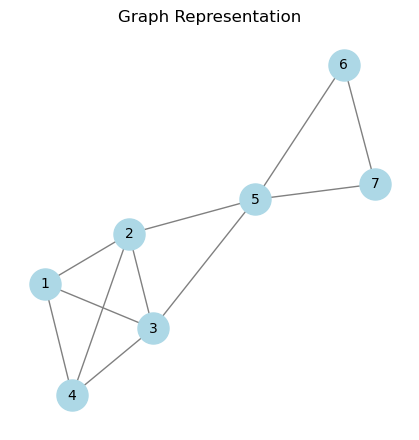

In [22]:

# code taken from https://github.com/cornchz/Bron-Kerbosch/tree/master

# Adjacency list (starting index 1)
NEIGHBORS = [
    [],  # Ignoring index 0
    [2, 3, 4],
    [1, 3, 4, 5],
    [1, 2, 4, 5],
    [1, 2, 3],
    [2, 3, 6, 7],
    [5, 7],
    [5, 6]
]
NODES = set(range(1, len(NEIGHBORS)))

# Create a graph
G = nx.Graph()

# Add edges based on adjacency list
for node, neighbors in enumerate(NEIGHBORS):
    if node == 0:  # Skip index 0
        continue
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Draw the graph
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(G, seed = 42)  # Layout for nodes
nx.draw(
    G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500, font_size=10
)
plt.title("Graph Representation")
plt.show()

In [23]:
MIN_SIZE = 3

class Reporter(object):
    def __init__(self, name, verbose):
        self.name = name
        self.cnt = 0
        self.cliques = []
        self.verbose = verbose
 
    def inc_count(self):
        self.cnt += 1
 
    def record(self, clique):
        self.cliques.append(clique)
 
    def print_report(self):
        print (self.name)
        print ('%d recursive calls' % self.cnt)
        for i, clique in enumerate(self.cliques):
            print ('%d: %s' % (i, clique))
        print()


def pick_random(s):
    if s:
        elem = s.pop()
        s.add(elem)
        return elem


def bronker_bosch1(clique, candidates, excluded, reporter, depth = 0):
    '''Naive Bron–Kerbosch algorithm'''
    if reporter.verbose:
        print(f'{'---'*depth}clique: {clique}, candidates: {candidates}, excluded: {excluded}')
    reporter.inc_count()
    if not candidates and not excluded:
        if len(clique) >= MIN_SIZE:
            reporter.record(clique)
        return
 
    for v in list(candidates):
        new_candidates = candidates.intersection(NEIGHBORS[v])
        new_excluded = excluded.intersection(NEIGHBORS[v])
        bronker_bosch1(clique + [v], new_candidates, new_excluded, reporter, depth+1)
        candidates.remove(v)
        excluded.add(v)



def bronker_bosch2(clique, candidates, excluded, reporter, depth = 0):
    '''Bron–Kerbosch algorithm with pivot'''
    if reporter.verbose:
        print(f'{'---'*depth}clique: {clique}, candidates: {candidates}, excluded: {excluded}')
    reporter.inc_count()
    if not candidates and not excluded:
        if len(clique) >= MIN_SIZE:
            reporter.record(clique)
        return
 
    pivot = pick_random(candidates) or pick_random(excluded)
    for v in list(candidates.difference(NEIGHBORS[pivot])):
        new_candidates = candidates.intersection(NEIGHBORS[v])
        new_excluded = excluded.intersection(NEIGHBORS[v])
        bronker_bosch2(clique + [v], new_candidates, new_excluded, reporter, depth+1)
        candidates.remove(v)
        excluded.add(v)


funcs = [bronker_bosch1,
		bronker_bosch2]

for func in funcs:
	report = Reporter('## %s' % func.__doc__, verbose = True)
	func([], set(NODES), set(), report)
	report.print_report()

clique: [], candidates: {1, 2, 3, 4, 5, 6, 7}, excluded: set()
---clique: [1], candidates: {2, 3, 4}, excluded: set()
------clique: [1, 2], candidates: {3, 4}, excluded: set()
---------clique: [1, 2, 3], candidates: {4}, excluded: set()
------------clique: [1, 2, 3, 4], candidates: set(), excluded: set()
---------clique: [1, 2, 4], candidates: set(), excluded: {3}
------clique: [1, 3], candidates: {4}, excluded: {2}
---------clique: [1, 3, 4], candidates: set(), excluded: {2}
------clique: [1, 4], candidates: set(), excluded: {2, 3}
---clique: [2], candidates: {3, 4, 5}, excluded: {1}
------clique: [2, 3], candidates: {4, 5}, excluded: {1}
---------clique: [2, 3, 4], candidates: set(), excluded: {1}
---------clique: [2, 3, 5], candidates: set(), excluded: set()
------clique: [2, 4], candidates: set(), excluded: {1, 3}
------clique: [2, 5], candidates: set(), excluded: {3}
---clique: [3], candidates: {4, 5}, excluded: {1, 2}
------clique: [3, 4], candidates: set(), excluded: {1, 2}
----

## Using a random Graph to show the worst case scenario

When the Graph is a fully connected graph this algorithm has to take 2^n steps, which is really bad. Using pivot we reduce the number of steps to n. 

This shows that pivot really shines when there is a big amount of cliques. When the amount of cliques is small the amount of steps saved is not that big

In [24]:
from random import random
from itertools import product, combinations

def random_graph(n, p, *, directed=False):
    nodes = range(n)
    adj_list = [[] for i in nodes]
    possible_edges = product(nodes, repeat=2) if directed else combinations(nodes, 2)
    for u, v in possible_edges:
        if random() < p:
            adj_list[u].append(v)
            if not directed:
                adj_list[v].append(u)
    return adj_list


n = 100
MIN_SIZE = n
NEIGHBORS = [[]]+random_graph(n, 0.08)
for i in range(len(NEIGHBORS)):
     NEIGHBORS[i] = np.array(NEIGHBORS[i]) +1
# print(NEIGHBORS)
NODES = set(range(1,n+1))
G = nx.Graph()
for node, neighbors in enumerate(NEIGHBORS):
    if node == 0:  # Skip index 0
        continue
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

for func in funcs:
    report = Reporter('## %s' % func.__doc__, verbose = False)
    func([], set(NODES), set(), report)
    report.print_report()

## Naive Bron–Kerbosch algorithm
594 recursive calls

## Bron–Kerbosch algorithm with pivot
555 recursive calls



In [25]:
n = 100
MIN_SIZE = n
NEIGHBORS = [[]]+random_graph(n, 0.5)
for i in range(len(NEIGHBORS)):
     NEIGHBORS[i] = np.array(NEIGHBORS[i]) +1
# print(NEIGHBORS)
NODES = set(range(1,n+1))
G = nx.Graph()
for node, neighbors in enumerate(NEIGHBORS):
    if node == 0:  # Skip index 0
        continue
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

for func in funcs:
	report = Reporter('## %s' % func.__doc__, verbose = False)
	func([], set(NODES), set(), report)
	report.print_report()

## Naive Bron–Kerbosch algorithm
172584 recursive calls

## Bron–Kerbosch algorithm with pivot
86479 recursive calls



In [26]:
n = 15
MIN_SIZE = n+1
NEIGHBORS = [[]]+random_graph(n, 1)
for i in range(len(NEIGHBORS)):
     NEIGHBORS[i] = np.array(NEIGHBORS[i]) +1
# print(NEIGHBORS)
NODES = set(range(1,n+1))
G = nx.Graph()
for node, neighbors in enumerate(NEIGHBORS):
    if node == 0:  # Skip index 0
        continue
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

for func in funcs:
	report = Reporter('## %s' % func.__doc__, verbose = False)
	func([], set(NODES), set(), report)
	report.print_report()

## Naive Bron–Kerbosch algorithm
32768 recursive calls

## Bron–Kerbosch algorithm with pivot
16 recursive calls



# Louvain Algorithm

Is an iterative algorithm that aim to optimize the modularity of the network, which is a measure of the density of links inside communities compared to links between communities.

## Steps of the Louvain Algorithm

1. **Initialization**: Each node is initially assigned to its own community.
2. **Modularity Optimization**: For each node, the algorithm evaluates the gain in modularity by moving the node to the community of each of its neighbors. The node is then moved to the community that results in the highest gain in modularity.
3. **Community Aggregation**: Once no further improvement can be made, each community is treated as a single node, and the process is repeated.

## Importance of Node Order

The order in which nodes are processed can significantly impact the results of the Louvain algorithm. Different node orders can lead to different community structures, beacause the algorithm is greedy and chooses the best node in a first to come basis. We explore the meaning of using one 

Modularity: 0.41880341880341876


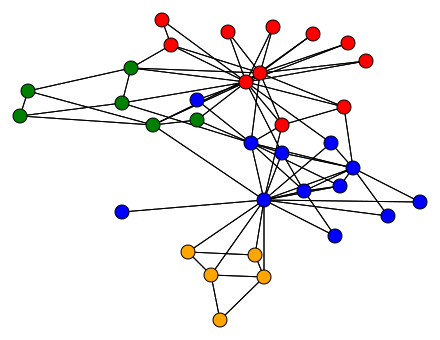

In [27]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
names = None
position = graph.position
# clustering
louvain = Louvain()
labels = louvain.fit_predict(adjacency)
image = visualize_graph(adjacency, position, names=names, labels=labels)
print(f'Modularity: {get_modularity(adjacency, labels)}')
SVG(image)

In [28]:
# Ordering py pagerank ASC
def invert_permutation(p):
    """Return an array s with which np.array_equal(arr[p][s], arr) is True.
    The array_like argument p must be some permutation of 0, 1, ..., len(p)-1.
    """
    p = np.asanyarray(p) # in case p is a tuple, etc.
    s = np.empty_like(p)
    s[p] = np.arange(p.size)
    return s

pagerank = PageRank()
weights = {0: 1}
index = np.argsort(pagerank.fit_predict(adjacency, weights))
adj_page_rank = adjacency[index][:, index]
labels = louvain.fit_predict(adj_page_rank)
image1 = visualize_graph(adjacency, position, names=names, labels=labels[invert_permutation(index)])
print(f'Modularity: {get_modularity(adjacency, labels[invert_permutation(index)])}')

Modularity: 0.4155982905982906


In [29]:
# Ordering py pagerank DESC
index = np.argsort(-pagerank.fit_predict(adjacency, weights))
adj_page_rank = adjacency[index][:, index]
labels = louvain.fit_predict(adj_page_rank)
image2 = visualize_graph(adjacency, position, names=names, labels=labels[invert_permutation(index)])
print(f'Modularity: {get_modularity(adjacency, labels[invert_permutation(index)])}')

Modularity: 0.41880341880341876


In [30]:
# Ordering py katz ASC
katz = Katz()
index = np.argsort(katz.fit_predict(adjacency))
adj_page_rank = adjacency[index][:, index]
labels = louvain.fit_predict(adj_page_rank)
modularity = get_modularity(adjacency, labels[invert_permutation(index)])
image3 = visualize_graph(adjacency, position, names=names, labels=labels[invert_permutation(index)])
print(f'Modularity: {get_modularity(adjacency, labels[invert_permutation(index)])}')

Modularity: 0.4155982905982906


In [31]:
index = np.argsort(-katz.fit_predict(adjacency))
adj_page_rank = adjacency[index][:, index]
labels = louvain.fit_predict(adj_page_rank)
modularity = get_modularity(adjacency, labels[invert_permutation(index)])
image4 = visualize_graph(adjacency, position, names=names, labels=labels[invert_permutation(index)])
print(f'Modularity: {get_modularity(adjacency, labels[invert_permutation(index)])}')

Modularity: 0.41880341880341876


In [32]:
html_content = f"""
<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 20px; background-color: white;">
	<div style="text-align: center;">
		<h3 style="color: black;">Pagerank ASC</h3>
		{SVG(image1).data}
	</div>
	<div style="text-align: center;">
		<h3 style="color: black;">Pagerank DESC</h3>
		{SVG(image2).data}
	</div>
	<div style="text-align: center;">
		<h3 style="color: black;">Katz ASC</h3>
		{SVG(image3).data}
	</div>
	<div style="text-align: center;">
		<h3 style="color: black;">Katz DESC</h3>
		{SVG(image4).data}
	</div>
</div>
"""

display_html(html_content, raw=True)

Pagerank ASC 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Pagerank DESC 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Katz ASC 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Katz DESC

## Trying with a bigger sample, the Notre dame dataset

In [33]:

file_path = "data/web-NotreDame.txt"
output_list = []

# Read the file
with open(file_path, 'r') as file:
    for line in file:
        a, b = map(int, line.strip().split('\t'))
        output_list.append((a, b))

In [34]:
results = []
adjacency = from_edge_list(output_list)
# clustering
louvain = Louvain()
labels = louvain.fit_predict(adjacency)
modularity = get_modularity(adjacency, labels)
total_clusters = (np.unique(labels)).size
results.append((modularity,'default' , total_clusters, labels))

# GET PAGERANK ASC
index = np.argsort(pagerank.fit_predict(adjacency, weights))
adj_page_rank = adjacency[index][:, index]
labels = louvain.fit_predict(adj_page_rank)
labels_method = labels[invert_permutation(index)]
modularity = get_modularity(adjacency, labels_method)
total_clusters = (np.unique(labels)).size
results.append((modularity,'pagerank ASC' , total_clusters, labels_method))

# GET KATZ ASC

katz = Katz()
index = np.argsort(katz.fit_predict(adjacency))
adj_page_rank = adjacency[index][:, index]
labels = louvain.fit_predict(adj_page_rank)
labels_method = labels[invert_permutation(index)]
modularity = get_modularity(adjacency, labels_method)
total_clusters = (np.unique(labels)).size
results.append((modularity,'Katz ASC' , total_clusters, labels_method))

# GET PAGERANK DESC
index = np.argsort(-pagerank.fit_predict(adjacency, weights))
adj_page_rank = adjacency[index][:, index]
labels = louvain.fit_predict(adj_page_rank)
labels_method = labels[invert_permutation(index)]
modularity = get_modularity(adjacency, labels_method)
total_clusters = (np.unique(labels)).size
results.append((modularity,'pagerank DESC' , total_clusters, labels_method))



# GET KATZ DESC
index = np.argsort(-katz.fit_predict(adjacency))
adj_page_rank = adjacency[index][:, index]
labels = louvain.fit_predict(adj_page_rank)
labels_method = labels[invert_permutation(index)]
modularity = get_modularity(adjacency, labels_method)
total_clusters = (np.unique(labels)).size
results.append((modularity,'Katz DESC' , total_clusters, labels_method))

results.sort()
for m, n, c, _ in results:
	print(f'Modularity: {m:.4f}, Number of clusters created: {c}, Method: {n}\t')


Modularity: 0.9429, Number of clusters created: 565, Method: Katz DESC	
Modularity: 0.9437, Number of clusters created: 400, Method: pagerank ASC	
Modularity: 0.9440, Number of clusters created: 433, Method: Katz ASC	
Modularity: 0.9452, Number of clusters created: 1139, Method: default	
Modularity: 0.9456, Number of clusters created: 678, Method: pagerank DESC	


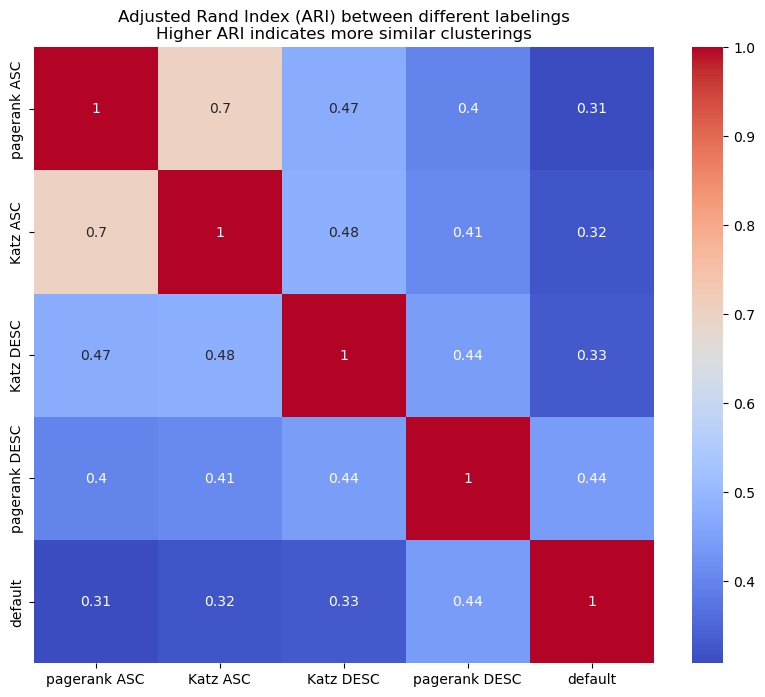

In [35]:


results.sort(key=lambda x: x[2])
labels = [labels for _, _, _, labels in results]


# Calculate the ARI between each pair of labels
n_labels = len(labels)
ari_matrix = np.zeros((n_labels, n_labels))

for i in range(n_labels):
	for j in range(n_labels):
		ari_matrix[i, j] = adjusted_rand_score(labels[i], labels[j])

# Plot the ARI matrix
plt.figure(figsize=(10, 8))
sns.heatmap(ari_matrix, annot=True, cmap='coolwarm', xticklabels=[res[1] for res in results], yticklabels=[res[1] for res in results])
plt.title('Adjusted Rand Index (ARI) between different labelings\nHigher ARI indicates more similar clusterings')
plt.show()

## In summary

Sorting the graph will have an effect, although an small one. Apparently sorting by pagerank DESC leads to the best result and it makes sense since it would take into consideration the most important nodes first. 

The change in modularity however seems to be a small amount. The real change occurs not in the modularity but rather on where the nodes that could easily belong to one or another node goes.


When using PageRank DESC, then higher PageRank scores (more important nodes) are processed first. This means that we prioritize important nodes and care the most about central nodes in the clusters. 

When using PageRank DESC, then less important nodes are processed first. This means that communities are defined first on the "outskirts".


The amount of clusters found also varies from one method to the other. When no ordering is applied the result was higher, meaning that we might have some unnecessary clusters. PageRank DESC and Katz ASC behave similarly and create a similar amount of clusters which is lower than the one generated by their ASC counterpart.

The most similar methods are PageRank ASC and Katz ASC. Their DESC counterparts are also similar but not as much. Finally the default version (with no ordering added) is the most distinct to everyone. This means that to have consistent results it is a good idea to sort the nodes and choose what you want to prioritize, central nodes or peripherial nodes.